# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The SATs and the ACTs are the two most popular exams used for admissions into colleges in the United States of America (USA). However, their differing assessment criterias, subjects tested and grading standards has divided students to pick one over the other. This has also been reflected onto the popularity of the exams across all states in USA.

With various state-wide and college-based regulations as well as mandatory ACT testing in certain states, there seems to be a decline in the participation rate of the SATs. The [New York Times](https://www.nytimes.com/2020/05/23/us/SAT-ACT-abolish-debate-california.html) has even reported that University of California will stop requiring the need for SATs and ACTs for admissions entirely. 

This Project will investigate and understand the trends between the participation rates and scores of the SATs and ACTS from the years 2017 to 2018. From the findings, recommendations will be proposed to improve the participation rates of the SATs.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
from scipy.stats import skew

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat2017 = pd.read_csv( '../data/sat_2017.csv') #reading sat_2017 file
act2017 = pd.read_csv('../data/act_2017.csv') #reading act_2017 file

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

**SAT 2017**

The SAT data provides an overview of the average SATS scores amongst all states with details of the participation rates, individual subject scores and the total scores . The SATs subjects being looked at are the Evidence-Based Reading and Writing and Math, and the total SAT score which is a sum of the two subjects.

**ACT 2017**

The ACT data consists of the average respective scores across subjects as well as the overall score (also known as composite score) for all states and details the national averages for these scores as well. Unlike the SATs, the ACTs make use of scaled scores. [More details on scaled scores can be found here.]('https://blog.prepscholar.com/how-is-the-act-scored) The data consists of 7 columns namely, 'State', 'Participation', 'English', 'Math', 'Reading', 'Science' and 'Composite'. These represent the states, percentage participation from the states, the different subjects that are part of the ACT examinations as well as the average of these subjects.

#### 4a. Does the data look complete? 

Answer:

Yes, as there are no missing values across both datasets

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 

**ACT**

For each ACT subject and overall composite score, the minimum possible score is 1 and the maximum possible value is 36.

Note: These are scaled scores from original score.
https://blog.prepscholar.com/how-is-the-act-scored

**SAT**

For each SAT subject, the minimum score is 200 and the maximum score is 800. Hence the minimum and maximum total scores are 400 and 1600 respectively. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

There is erroneous data in the SAT 2017 dataset. As mentioned earlier, for the state of Maryland, the average math score is 52, which is not a possible value. 

After cross-checking with the [original dataset](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/), the average score is 524. 

There is another erroneous data in the ACT 2017 dataset as well. For the state of Maryland, the average science score is 2.3. Although 2.3 is a possible score in the ACT exams, it is a wrong entry. Just by looking at the present dataset, this can be identified by looking at the composite score, which is the average of all the 4 subjects. With 2.3 for Science, the composite score will then be 18.2, instead of 23.6.

After cross-checking with the [original dataset](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf), the average science score for the state of Maryland should be 23 instead of 2.3.

In [5]:
#Error in SAT data
sat2017.loc[sat2017['State'] == 'Maryland', 'Math']= 524


#Error in ACT data
act2017.loc[act2017['State'] == 'Maryland', 'Science'] = 23.2

In [6]:
#Display edited data for SAT
sat2017.loc[sat2017['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [7]:
#Display edited data for ACT
act2017.loc[act2017['State'] == 'Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
sat2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [9]:
act2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

**SAT 2017**

The datatypes for the SAT dataframe seem to be appropriate generally. The participation rate should hold a float value as it represents percentage.

**ACT 2017**

As the composite score is the average of all the subjects taken, it should take a float value as well. Additionally, just like the SAT2017 dataset, the participation rate should also hold a float value as it represents percentage. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [10]:
#function to convert participation rates
def convert_datatype(entry):
    return float(entry.replace("%", ""))/100

In [11]:
#apply function to convert participation rates to appropriate types
sat2017['Participation'] = sat2017['Participation'].apply(convert_datatype)
act2017['Participation'] = act2017['Participation'].apply(convert_datatype)

- Fix any individual values preventing other columns from being the appropriate type.

In [12]:
#remove x in the values from the composite columns
act2017['Composite'] = act2017['Composite'].str.replace('x', '')

- Finish your data modifications by making sure the columns are now typed appropriately.

In [13]:
#convert the values to float
act2017['Composite'] = act2017['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [14]:
display(sat2017.dtypes)
display(act2017.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [15]:
#changing column names for SAT data
sat2017 =sat2017.rename(columns = { 'State' : 'state',
                                    'Participation' : 'sat_part_2017', 
                                    'Evidence-Based Reading and Writing':'sat_erw_2017', 
                                    'Math' : 'sat_math_2017',
                                    'Total': 'sat_total_2017'})

In [16]:
#display edited column names for SAT 2017 dataframe
sat2017.columns

Index(['state', 'sat_part_2017', 'sat_erw_2017', 'sat_math_2017',
       'sat_total_2017'],
      dtype='object')

In [17]:
#changing column names for ACT data
act2017 = act2017.rename(columns = {'State' : 'state',
                                    'Participation': 'act_part_2017',
                                    'English': 'act_english_2017',
                                    'Math': 'act_math_2017',
                                    'Reading': 'act_reading_2017',
                                    'Science': 'act_science_2017',
                                    'Composite': 'act_composite_2017'})

In [18]:
#display edited column names for ACT 2017 dataframe
act2017.columns

Index(['state', 'act_part_2017', 'act_english_2017', 'act_math_2017',
       'act_reading_2017', 'act_science_2017', 'act_composite_2017'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


## Data Dictionary

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|state|object|sat2017/act2017|Name of a state in USA|
|sat_part_2017|float64|sat2017|Participation Rate of a State| 
|sat_erw_2017|int64|sat2017|Average Evidence-Based Reading and Writing Score of a State| 
|sat_math_2017|int64|sat2017|Average Math Score of a State| 
|sat_total_2017|int64|sat2017|Average Total Score of a State| 
|act_part_2017|float64|act2017|Participation Rate of a State| 
|act_english_2017|float64|act2017|Average English Score of a State| 
|act_math_2017|float64|act2017|Average Math Score of a State| 
|act_reading_2017|float64|act2017|Average Reading Score of a State| 
|act_science_2017|float64|act2017|Average Science Score of a State|
|act_composite_2017|float64|act2017|Average Composite Score of a State|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [19]:
#The ACT dataset has an extra row compared to the SAT dataset
#First we are going to identify the row

act2017[~act2017['state'].isin(sat2017['state'])]

,state,act_part_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,0.6,20.3,20.7,21.4,21.0,21.0


In [20]:
#Remove the extra row from the ACT dataset
act2017 = act2017.drop([0])

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
tests2017 = sat2017.merge(act2017, on = 'state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [22]:
tests2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [23]:
#read 2018 ACT and SAT files
sat2018 = pd.read_csv( '../data/sat_2018.csv')
act2018 = pd.read_csv('../data/act_2018_updated.csv')

In [24]:
#display first 10 rows from 2018 ACT and SAT files
sat2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [25]:
act2018.head(10)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


Now we are going to check the data to identify any errors, missing values and fix the datatypes to the appropriate values

In [26]:
display(sat2018.info())
display(act2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


None

In [27]:
#Convert datatypes
#SAT2018
sat2018['Participation'] = sat2018['Participation'].apply(convert_datatype)

In [28]:
#ACT2018
act2018['Percentage of Students Tested'] = (act2018['Percentage of Students Tested'] / 100).astype(float)

In [29]:
#Change column names
#SAT2018
sat2018 =sat2018.rename(columns = { 'State' : 'state',
                                    'Participation' : 'sat_part_2018', 
                                    'Evidence-Based Reading and Writing':'sat_erw_2018', 
                                    'Math' : 'sat_math_2018',
                                    'Total': 'sat_total_2018'})

In [30]:
#ACT2018
act2018 = act2018.rename(columns = {'State' : 'state',
                                    'Percentage of Students Tested': 'act_part_2018',
                                    'Average English Score': 'act_english_2018',
                                    'Average Math Score': 'act_math_2018',
                                    'Average Reading Score': 'act_reading_2018',
                                    'Average Science Score': 'act_science_2018',
                                    'Average Composite Score': 'act_composite_2018'})

In [31]:
#check updated datasets
display(sat2018.info())
display(act2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           51 non-null     object 
 1   sat_part_2018   51 non-null     float64
 2   sat_erw_2018    51 non-null     int64  
 3   sat_math_2018   51 non-null     int64  
 4   sat_total_2018  51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               51 non-null     object 
 1   act_part_2018       51 non-null     float64
 2   act_composite_2018  51 non-null     float64
 3   act_english_2018    51 non-null     float64
 4   act_math_2018       51 non-null     float64
 5   act_reading_2018    51 non-null     float64
 6   act_science_2018    51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


None

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [32]:
#merge 2018 SAT and ACT and store in variable temp
tests2018 = sat2018.merge(act2018, on = 'state')

#merge 2017 and 2018 datasets and store in variable final
final = tests2017.merge(tests2018, on = 'state')

In [33]:
final.to_csv('../data/final.csv')

## Updated Data Dictionary

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|state|object|final|Name of a state in USA|
|sat_part_2017|float64|final|Participation Rate of a State in 2017| 
|sat_erw_2017|int64|final|Average Evidence-Based Reading and Writing Score of a State in 2017| 
|sat_math_2017|int64|final|Average Math Score of a State in 2017| 
|sat_total_2017|int64|final|Average Total Score of a State in 2017| 
|act_part_2017|float64|final|Participation Rate of a State in 2017| 
|act_english_2017|float64|final|Average English Score of a State in 2017| 
|act_math_2017|float64|final|Average Math Score of a State in 2017| 
|act_reading_2017|float64|final|Average Reading Score of a State in 2017| 
|act_science_2017|float64|final|Average Science Score of a State in 2017|
|act_composite_2017|float64|final|Average Composite Score of a State in 2017|
|sat_part_2018|float64|final|Participation Rate of a State in 2018| 
|sat_erw_2018|int64|final|Average Evidence-Based Reading and Writing Score of a State in 2018| 
|sat_math_2018|int64|final|Average Math Score of a State in 2018| 
|sat_total_2018|int64|final|Average Total Score of a State in 2018| 
|act_part_2018|float64|final|Participation Rate of a State in 2018| 
|act_english_2018|float64|final|Average English Score of a State in 2018| 
|act_math_2018|float64|final|Average Math Score of a State in 2018| 
|act_reading_2018|float64|final|Average Reading Score of a State in 2018| 
|act_science_2018|float64|final|Average Science Score of a State in 2018|
|act_composite_2018|float64|final|Average Composite Score of a State in 2018|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [34]:
final.describe()

,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [35]:
#function to calculate standard deviation and takes parameters as column and dataframe
def cal_std(column, df):
    mean = sum(df[column])/len(df[column]) #calculate mean
    variance = sum((x - mean) ** 2 for x in df[column]) /len(df[column]) #calculate variance
    std = variance ** 0.5 #calculate standard deviation from variance
    return std

In [36]:
#test standard deviation function and test against numpy's std deviation method
display(cal_std('sat_part_2017', final))
display(np.std(final['sat_part_2017']))

0.3492907076664507

0.3492907076664507

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [37]:
#dictionary to store standard deviation of each column
sd = { column: cal_std(column, final) for column in final if column != 'state'}

#display column
sd

{'sat_part_2017': 0.3492907076664507,
 'sat_erw_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_part_2017': 0.3182417575123181,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_part_2018': 0.3694661922353942,
 'sat_erw_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_part_2018': 0.33745194881997503,
 'act_composite_2018': 2.0855261815801147,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

As checked previously, the manually calculated standard deviations match up with the output from numpy's std method. However, they do not match up with the output from pandas describe method. This is simply because the manually calculated standard deviation and numpy's std method make use of n degrees of freedom while pandas makes use of n-1 degrees of freedom.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

**Investigating Trends**

  a) Highest and Lowest Participation Rates

In [38]:
# The following function finds the states with the highest and lowest values of all numeric columns in a dataframe 
# and returns these values along with the respective states
# The function takes in two parameters; column and dataframe which represents the column where the values are being sought
# from and the dataframe it belongs to

def participation_rates(column, df):
    #columns with highest values
    highest = df[df[column] == df[column].max()][['state', column]]
    #columns with lowest values
    lowest = df[df[column] == df[column].min()][['state', column]]
    
    return highest, lowest

    i) 2017 SAT

In [39]:
highest_part_sat_2017, lowest_part_sat_2017 = participation_rates('sat_part_2017', final)
print("Highest Participation Rates - 2017 SAT")
display(highest_part_sat_2017)
print("\nLowest Participation Rates - 2017 SAT")
display(lowest_part_sat_2017)

Highest Participation Rates - 2017 SAT


,state,sat_part_2017
6,Connecticut,1.0
7,Delaware,1.0
8,District of Columbia,1.0
22,Michigan,1.0



Lowest Participation Rates - 2017 SAT


,state,sat_part_2017
15,Iowa,0.02
24,Mississippi,0.02
34,North Dakota,0.02


As seen in the tables above, for the 2017 SATs, Connecticut, Delaware, District of Columbia and Michigan have the highest participation rates of 100% while Iowa, Mississippi and North Dakota have the lowest participation rate of 2%.

    ii) 2018 SAT

In [40]:
highest_part_sat_2018, lowest_part_sat_2018 = participation_rates('sat_part_2018', final)
print("Highest Participation Rates - 2018 SAT")
display(highest_part_sat_2018)
print("\nLowest Participation Rates - 2018 SAT")
display(lowest_part_sat_2018)

Highest Participation Rates - 2018 SAT


,state,sat_part_2018
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
12,Idaho,1.0
22,Michigan,1.0



Lowest Participation Rates - 2018 SAT


,state,sat_part_2018
34,North Dakota,0.02


As seen in the tables above, for the 2018 SATs, Connecticut, Delaware and Michigan still have the highest participation rates of 100% with the addition of 2 new states namely, Colorado and Idaho. North Dakota now is the only state with the lowest participation rate of 2%.

    iii) 2017 ACT

In [41]:
highest_part_act_2017, lowest_part_act_2017 = participation_rates('act_part_2017', final)
print("Highest Participation Rates - 2017 ACT")
display(highest_part_act_2017)
print("\nLowest Participation Rates - 2017 ACT")
display(lowest_part_act_2017)

Highest Participation Rates - 2017 ACT


,state,act_part_2017
0,Alabama,1.0
3,Arkansas,1.0
5,Colorado,1.0
17,Kentucky,1.0
18,Louisiana,1.0
23,Minnesota,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
28,Nevada,1.0



Lowest Participation Rates - 2017 ACT


,state,act_part_2017
19,Maine,0.08


For the 2017 ACTs, there are numerous states with a 100% participation rate and they are Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming. Maine is the only state with the lowest participation rate at 8%.

    iv) 2018 ACT

In [42]:
highest_part_act_2018, lowest_part_act_2018 = participation_rates('act_part_2018', final)
print("Highest Participation Rates - 2018 ACT")
display(highest_part_act_2018)
print("\nLowest Participation Rates - 2018 ACT")
display(lowest_part_act_2018)

Highest Participation Rates - 2018 ACT


,state,act_part_2018
0,Alabama,1.0
3,Arkansas,1.0
17,Kentucky,1.0
18,Louisiana,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
27,Nebraska,1.0
28,Nevada,1.0
33,North Carolina,1.0



Lowest Participation Rates - 2018 ACT


,state,act_part_2018
19,Maine,0.07


The following states have kept their 100% participation rate again for the 2018 ACTs: Alabama, Arkansas, Kentucky, Louisiana, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming. We now have new states with 100% participation rate and they are Mississippi, Nebraska and Ohio. Maine still remains as the only state with the lowest participation rate with a lower percentage than 2017 at 7%. 

b) Highest and Lowest Mean Total/Composite Scores

In [43]:
# The following function finds the top 5 or bottom 5 states with the highest and lowest values respectively
# and returns these values along with the respective states in a dataframe
# The function takes in two parameters; column and dataframe which represents the column where the values are being sought
# from and the dataframe it belongs to

def total_scores(column, df):
    #top 5 highest values
    highest = df[['state', column]].sort_values(by = column).tail(5)
    #bottom 5 highest values
    lowest = df[['state', column]].sort_values(by = column).head(5)
    
    return highest, lowest

    i) 2017 SAT

In [44]:
highest_total_sat_2017, lowest_total_sat_2017 = total_scores('sat_total_2017', final)
print("Highest Mean Total Score - 2017 SAT")
display(highest_total_sat_2017)
print("\nLowest Mean Total Score - 2017 SAT")
display(lowest_total_sat_2017)

Highest Mean Total Score - 2017 SAT


,state,sat_total_2017
16,Kansas,1260
25,Missouri,1271
15,Iowa,1275
49,Wisconsin,1291
23,Minnesota,1295



Lowest Mean Total Score - 2017 SAT


,state,sat_total_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


For the 2017 SATs, Minnesota has the highest mean total score of 1260, followed by Wisconsin and Iowa with 1291 and 1275 respectively, while District of Colombia has the lowest mean total score of 950 with Delaware and Idaho just slightly ahead with 996 and 1005 respectively.

    ii) 2018 SAT

In [45]:
highest_total_sat_2018, lowest_total_sat_2018 = total_scores('sat_total_2018', final)
print("Highest Mean Total Score - 2018 SAT")
display(highest_total_sat_2018)
print("\nLowest Mean Total Score - 2018 SAT")
display(lowest_total_sat_2018)

Highest Mean Total Score - 2018 SAT


,state,sat_total_2018
16,Kansas,1265
15,Iowa,1265
34,North Dakota,1283
49,Wisconsin,1294
23,Minnesota,1298



Lowest Mean Total Score - 2018 SAT


,state,sat_total_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


In the 2018 SATs, Minnesota again has the highest mean total score of 1298, followed by Wisconsin and North Dakota with 1294 and 1283 respectively. On the other hand District of Colombia still has the lowest score of 977 with Delaware and West Virginia ahead with 998 and 999 respectively.

    iii) 2017 ACT

In [46]:
highest_total_act_2017, lowest_total_act_2017 = total_scores('act_composite_2017', final)
print("Highest Mean Total Score - 2017 ACT")
display(highest_total_act_2017)
print("\nLowest Mean Total Score - 2017 ACT")
display(lowest_total_act_2017)

Highest Mean Total Score - 2017 ACT


,state,act_composite_2017
8,District of Columbia,24.2
19,Maine,24.3
6,Connecticut,25.2
21,Massachusetts,25.4
29,New Hampshire,25.5



Lowest Mean Total Score - 2017 ACT


,state,act_composite_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In the 2017 ACTs, New Hampshire tops with the highest composite score of 25.5 with Massachusetts and Connecticut trailing behind with 25.4 and 25.2 respectively. On the other hand Nevada has the lowest composite score of 17.8 with Mississippi and South Carolina 18.6 and 18.7 respectively.

    iv) 2018 ACT

In [47]:
highest_total_act_2018, lowest_total_act_2018 = total_scores('act_composite_2018', final)
print("Highest Mean Total Score - 2018 ACT")
display(highest_total_act_2018)
print("\nLowest Mean Total Score - 2018 ACT")
display(lowest_total_act_2018)

Highest Mean Total Score - 2018 ACT


,state,act_composite_2018
22,Michigan,24.4
32,New York,24.5
29,New Hampshire,25.1
21,Massachusetts,25.5
6,Connecticut,25.6



Lowest Mean Total Score - 2018 ACT


,state,act_composite_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


In the 2017 ACTs, the Connecticut has the highest composite score of 25.6 with Massachusetts and New Hampshire closing in with 25.5 and 25.1 respectively. Contrarily, Nevada still has the lowest composite score of 17.7 with South Carolina and Mississippi slightly ahead with 18.3 and 18.6 respectively.

c) States with 100% participation on a given test have a rate change year-to-year

    i) SAT

In [48]:
#display states where participation was 100% for either the 2017 or 2018 SATs
final.loc[(final['sat_part_2017'] == 1.0) | (final['sat_part_2018'] == 1.0), ['state', 'sat_part_2017', 'sat_part_2018']]

,state,sat_part_2017,sat_part_2018
5,Colorado,0.11,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
8,District of Columbia,1.00,0.92
12,Idaho,0.93,1.00
22,Michigan,1.00,1.00


By comparing the participation rates of states between 2017 and 2018, we see that Connecticut, Delaware and Michigan have maintained their participation rate at 100%. However, we do see District of Columbia's participation rate falling from 100% to 92%. On the other hand there is a drastic improvement in Colarado's participation rates from 11% to 100% and a slight improvement in Idaho's participation rate from 93% to 100% as well.

    ii) ACT

In [49]:
#As we have seen in our analysis earlier, there are numerous states with 100% participation rates, 
#hence we will compare states that have either lowered their participation rates from 100% 
#or improved their participation rates to a 100%

#display states where participation was 100% for either the 2017 or 2018 ACTs
final.loc[(final['act_part_2017'] == 1.0) != (final['act_part_2018'] == 1.0), ['state', 'act_part_2017', 'act_part_2018']]

,state,act_part_2017,act_part_2018
5,Colorado,1.00,0.30
23,Minnesota,1.00,0.99
27,Nebraska,0.84,1.00
35,Ohio,0.75,1.00


The comparison between the 2017 and 2018 ACTs show that Colorado has a significant drop in their participation rates from 100% to 30% while there is a small dip in Minnesota's from 100% to 99%. Nebraska and Ohio on the other hand have improved their participation rates from 84% and 75% respectively to 100%

d) States that have >50% participation on both tests either year

In [50]:
final.loc[((final['sat_part_2017'] > 0.5) & (final['act_part_2017'] > 0.5)) | 
          ((final['sat_part_2018'] > 0.5) & (final['act_part_2018'] > 0.5)), 
          ['state', 'sat_part_2017', 'act_part_2017', 'sat_part_2018', 'act_part_2018']]

,state,sat_part_2017,act_part_2017,sat_part_2018,act_part_2018
9,Florida,0.83,0.73,0.56,0.66
10,Georgia,0.61,0.55,0.70,0.53
11,Hawaii,0.55,0.90,0.56,0.89
33,North Carolina,0.49,1.00,0.52,1.00
40,South Carolina,0.50,1.00,0.55,1.00


Florida, Georgia and Hawaii have had more than 50% participation on both tests for both 2017 and 2018, while North and South Carolina had more than 50% participation on both tests for 2018. 

e) Findings/observations that were interesting and/or peculiar

Colorado was one state that had significant changes in participation rates amongst tests and across years. Let's take a look at these numbers again.

In [51]:
final.loc[final['state'] == 'Colorado', ['state', 'sat_part_2017', 'sat_part_2018', 'sat_total_2017', 'sat_total_2018',
                                        'act_part_2017','act_part_2018', 'act_composite_2017', 'act_composite_2018']]

,state,sat_part_2017,sat_part_2018,sat_total_2017,sat_total_2018,act_part_2017,act_part_2018,act_composite_2017,act_composite_2018
5,Colorado,0.11,1.0,1201,1025,1.0,0.3,20.8,23.9


As seen above, there was a significant rise in the SAT participation rates from 2017 to 2018, however there was also a significant fall in the ACT participation rates from 2017 to 2018. This also corresponds to the fall in the mean total SAT scores and a rise in the mean composite ACT scores.            

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'Correlation Heatmap of ACT and SAT data for 2017-2018')

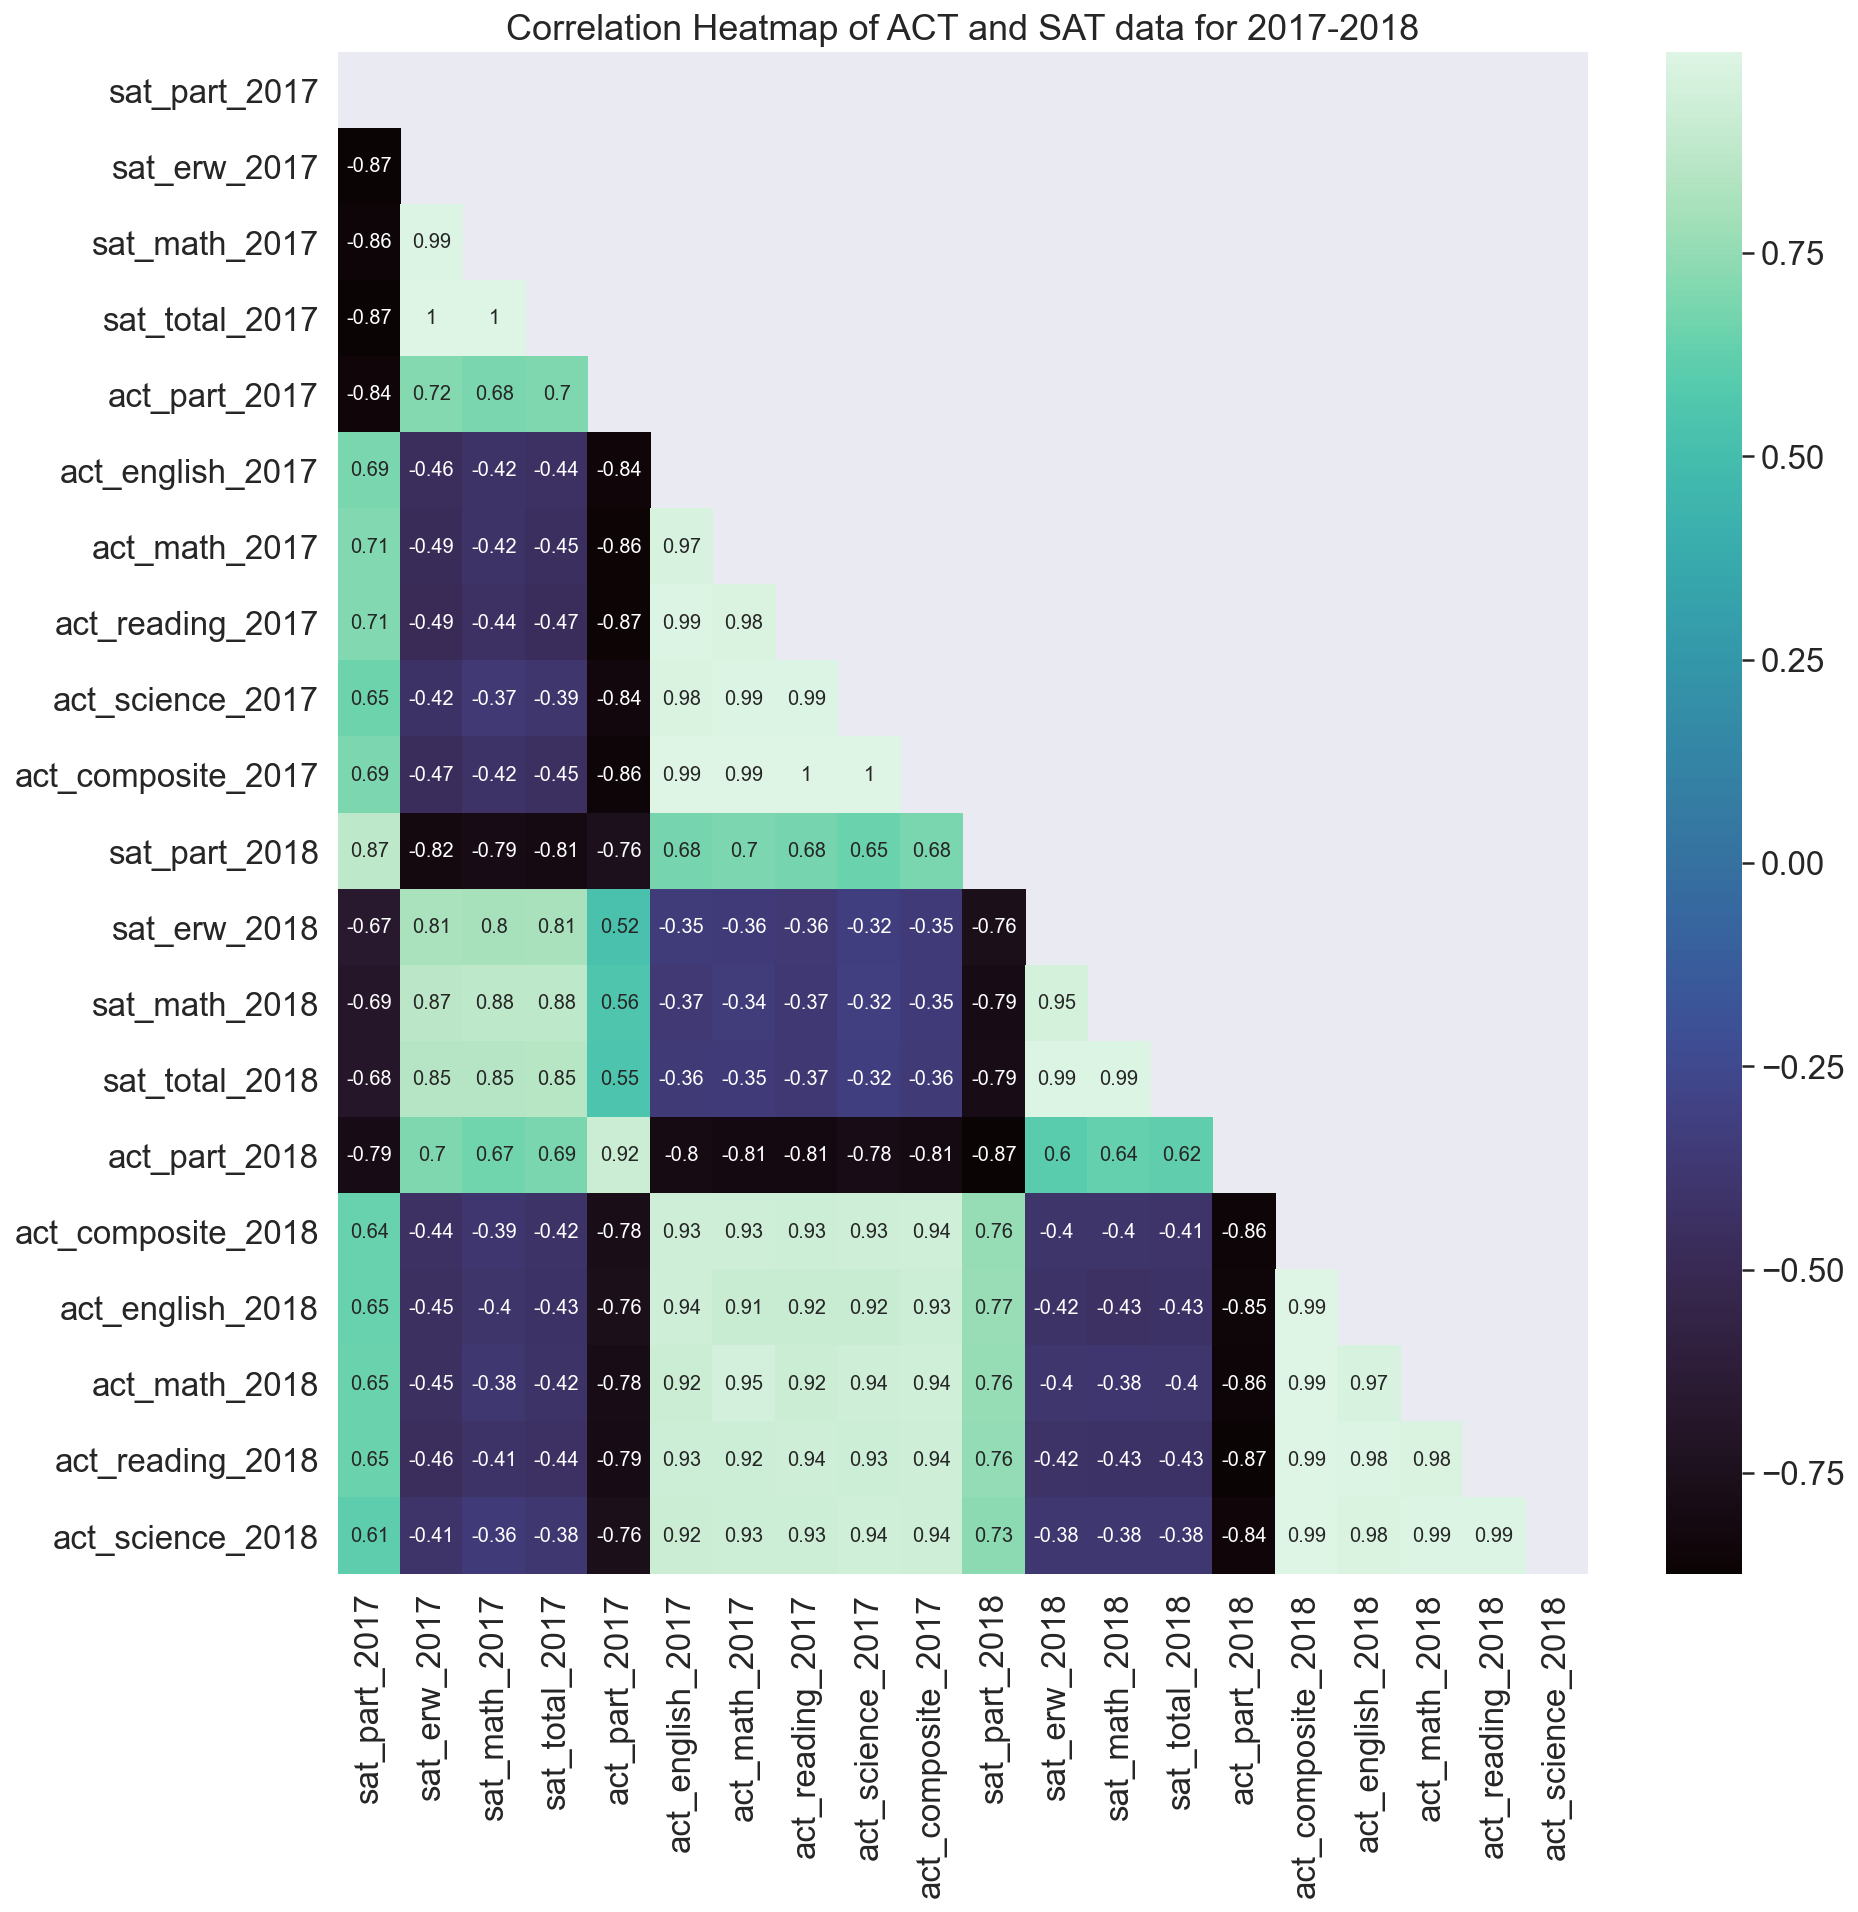

In [84]:
fig, ax = plt.subplots(figsize = (14,14)) 
tests_correlations = final.corr()
matrix = np.triu(final.corr()) #set mask to hide symmetrical values
sns.heatmap(tests_correlations, mask = matrix, annot = True, cmap= 'mako');
plt.title("Correlation Heatmap of ACT and SAT data for 2017-2018")

Based on the correlation heatmap, here are some observations that can be identified.

   - The SAT and ACT Participation Rates are negatively correlated with their respective subject test scores and the total scores.
     -> This means the higher the participation rate, the lower the test scores
   - The SAT and ACT Participation Rates have a negative correlation with the ACT Composite/SAT Total Scores
     -> The higher the ACT/SAT Participation, the lower the ACT Composite/SAT Total Score
   - States with high participation in 2017 also have a high participation in 2018 for both tests

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [54]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, bins = 15, figsize = (18,14)):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        hist = sns.histplot(dataframe[column], bins = bins, ax = ax[i], kde = True) # feel free to add more settings
        hist.set_title(list_of_titles[i], fontsize = 16)
        hist.set_xlabel(list_of_xlabels[i], fontsize = 14)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

a) Participation rates for SAT&ACT

Text(0.5, 0.98, 'Participation Rates across Tests')

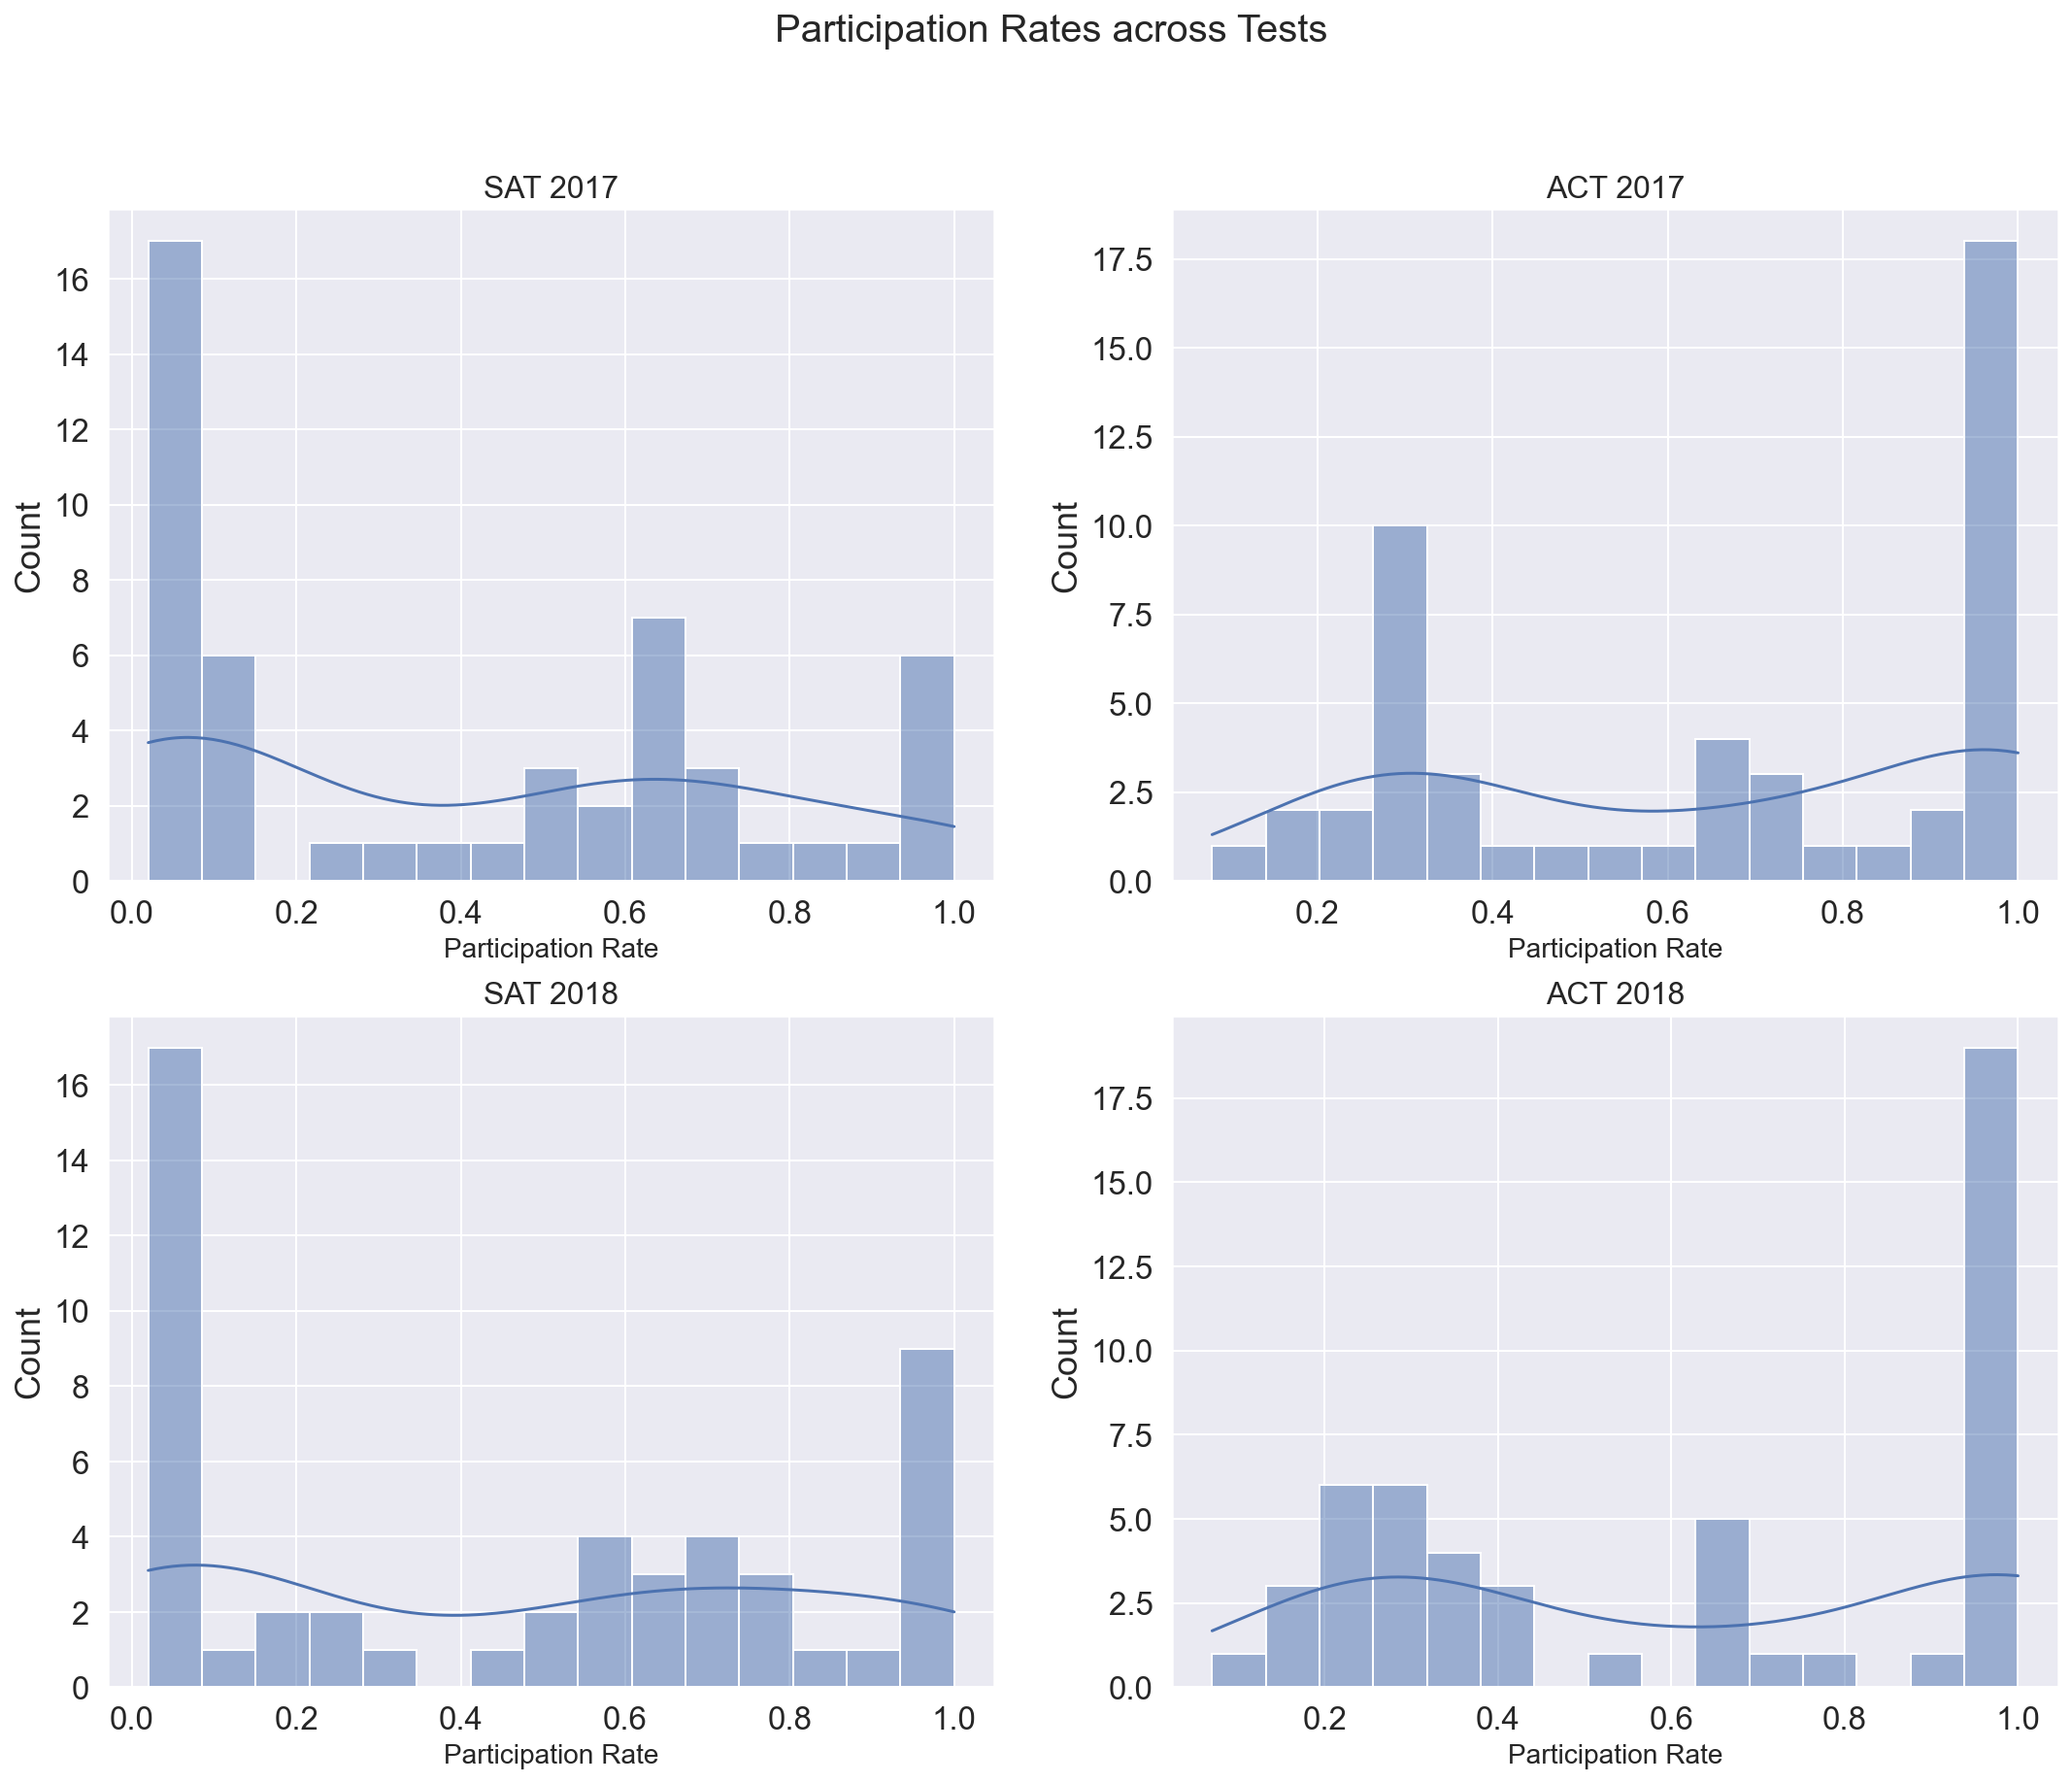

In [55]:
subplot_histograms(final, ['sat_part_2017', 'act_part_2017', 'sat_part_2018', 'act_part_2018'],
                  ['SAT 2017', 'ACT 2017', 'SAT 2018', 'ACT 2018'],
                  ['Participation Rate', 'Participation Rate', 'Participation Rate', 'Participation Rate'])
plt.suptitle("Participation Rates across Tests", fontsize = 20)

The participation rates for the SATs and the ACTs have a bimodal distribution for both years, there is bimodal distribution as seen by the peaks at both ends. The SAT participation rates for both years seem to be skewed more to the right while the ACT participation rates seem to be skewed more towards the left.

b) Math Scores for SATs and ACTS

Text(0.5, 0.98, 'Participation Rates across Tests')

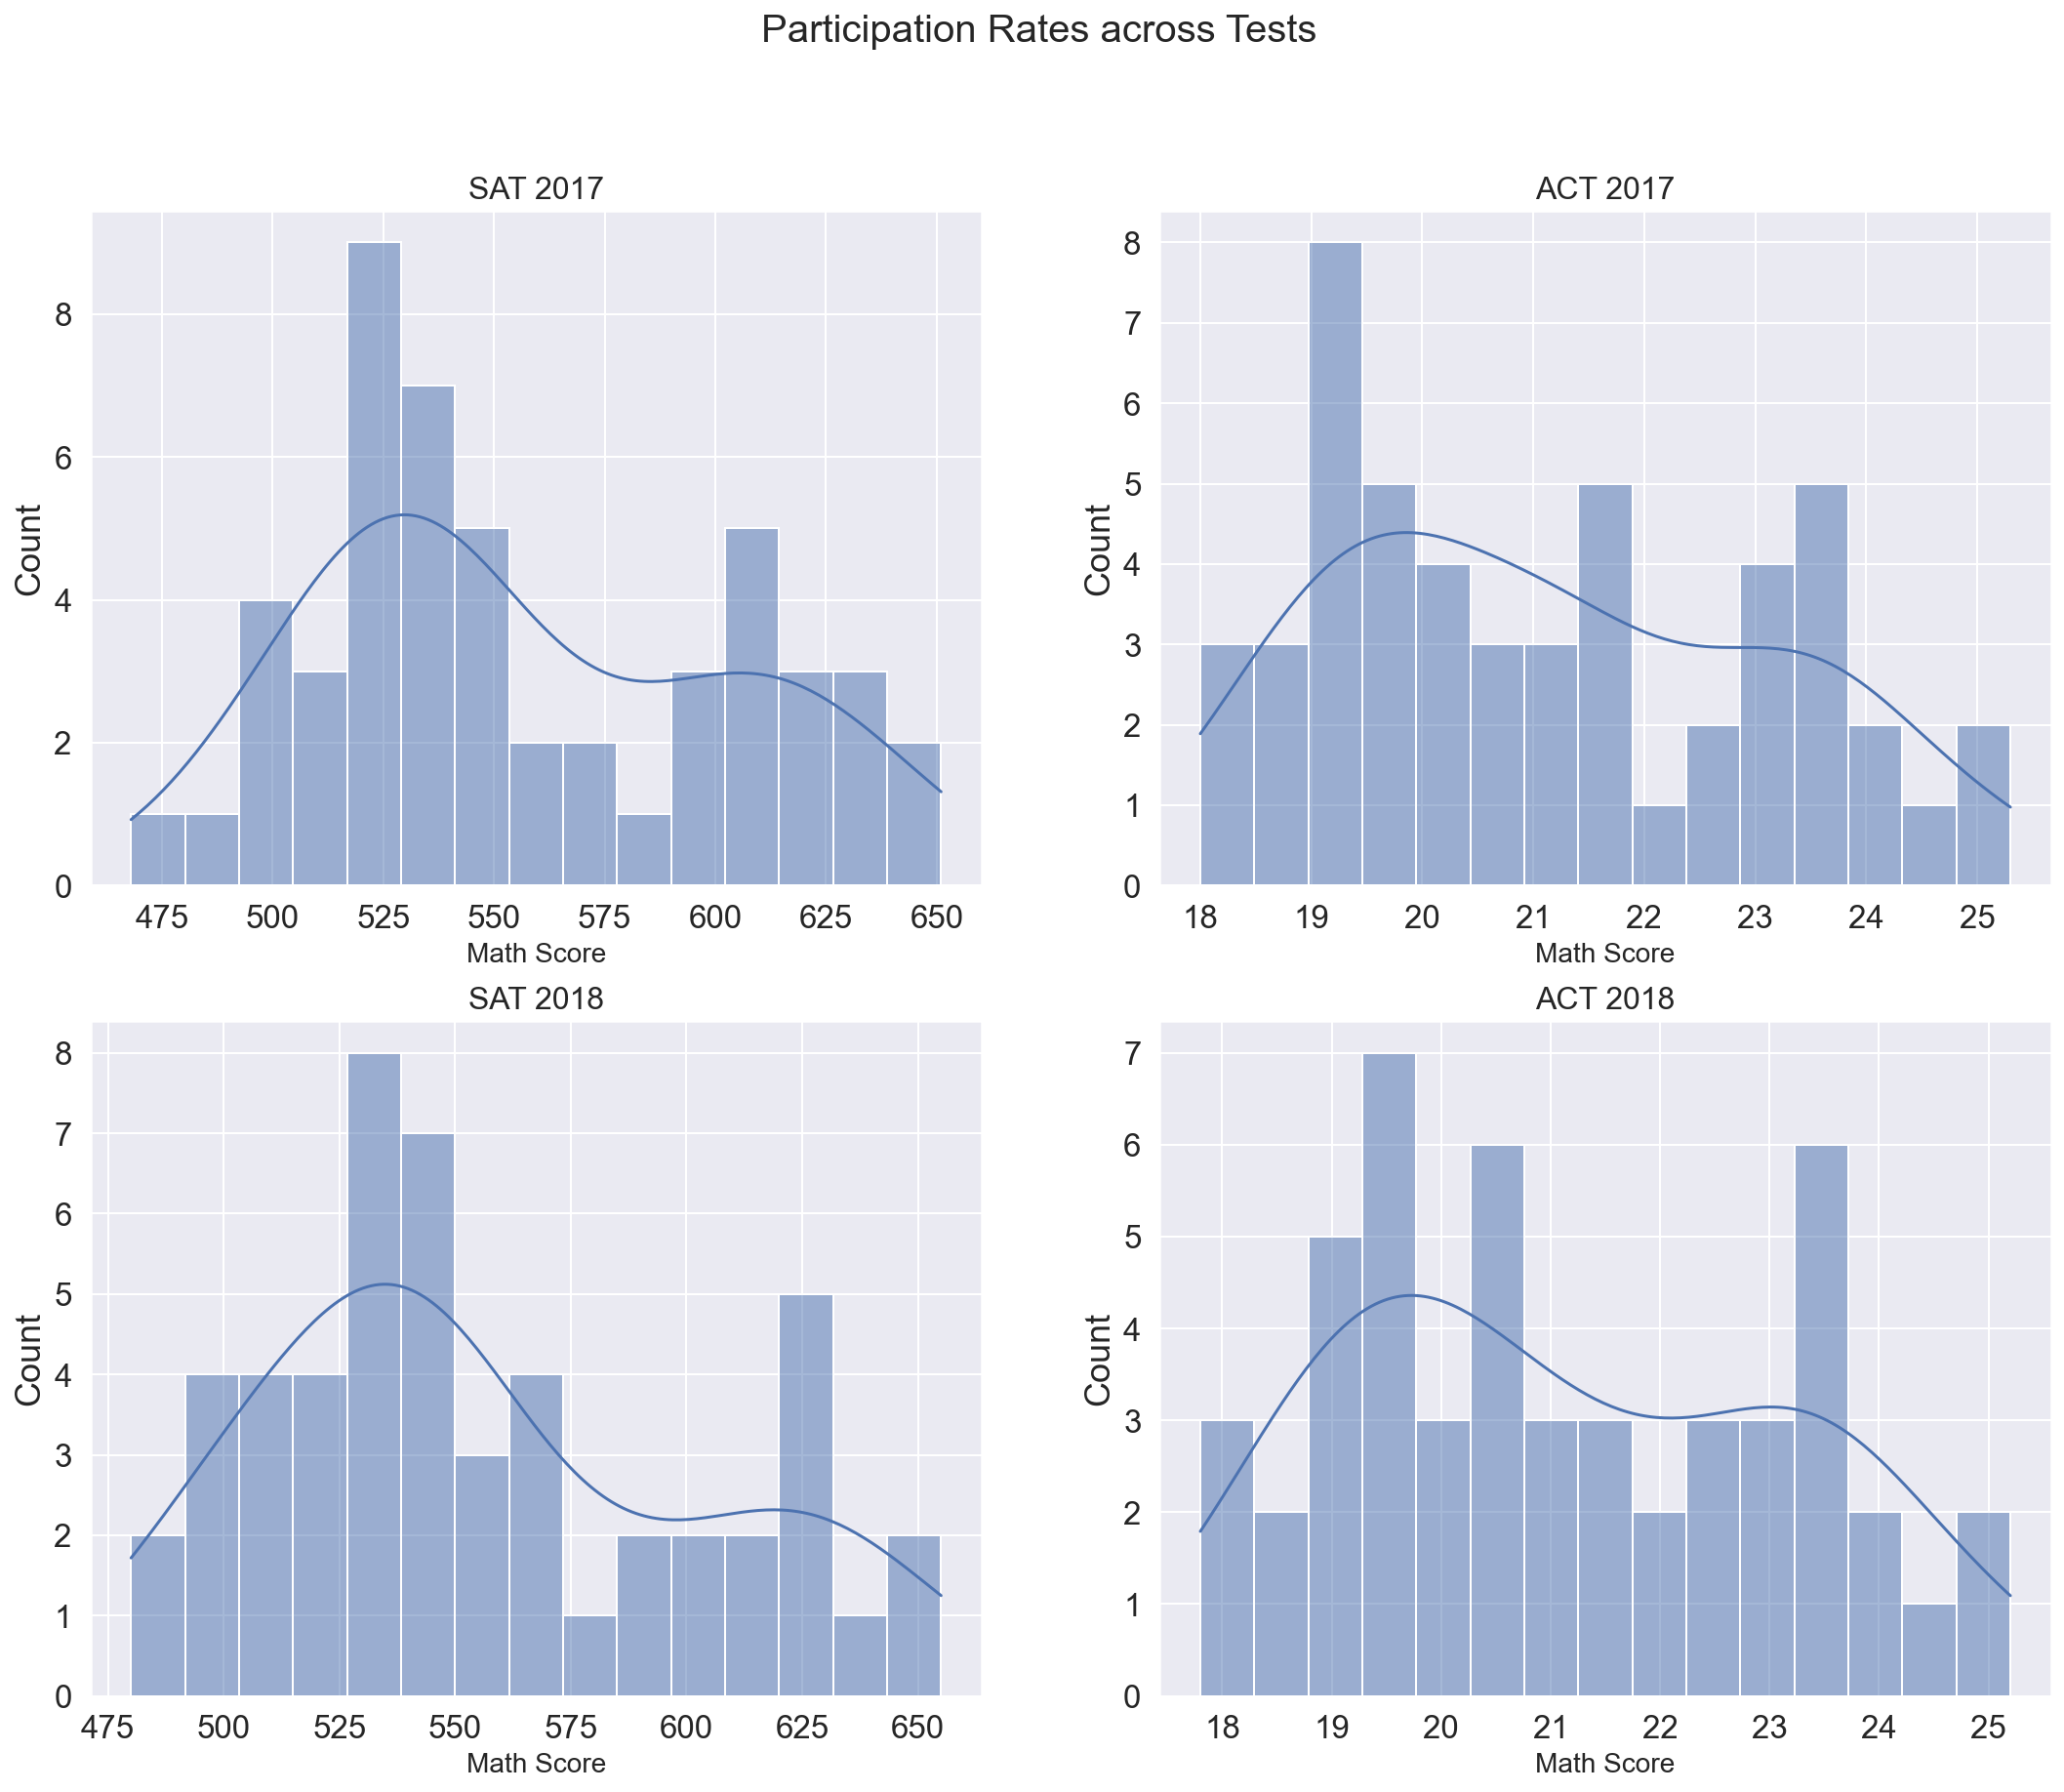

In [56]:
subplot_histograms(final, ['sat_math_2017', 'act_math_2017', 'sat_math_2018', 'act_math_2018'],
                  ['SAT 2017', 'ACT 2017', 'SAT 2018', 'ACT 2018'],
                  ['Math Score', 'Math Score', 'Math Score', 'Math Score'])
plt.suptitle("Participation Rates across Tests", fontsize = 20)

The math scores for the SATs and the ACTs have a bimodal distribution for both years and all the distributions seem to be skewed more towards the right.

c) Reading and Verbal Scores for SATs and ACTs

Text(0.5, 0.98, 'Reading and Verbal Scores across Tests')

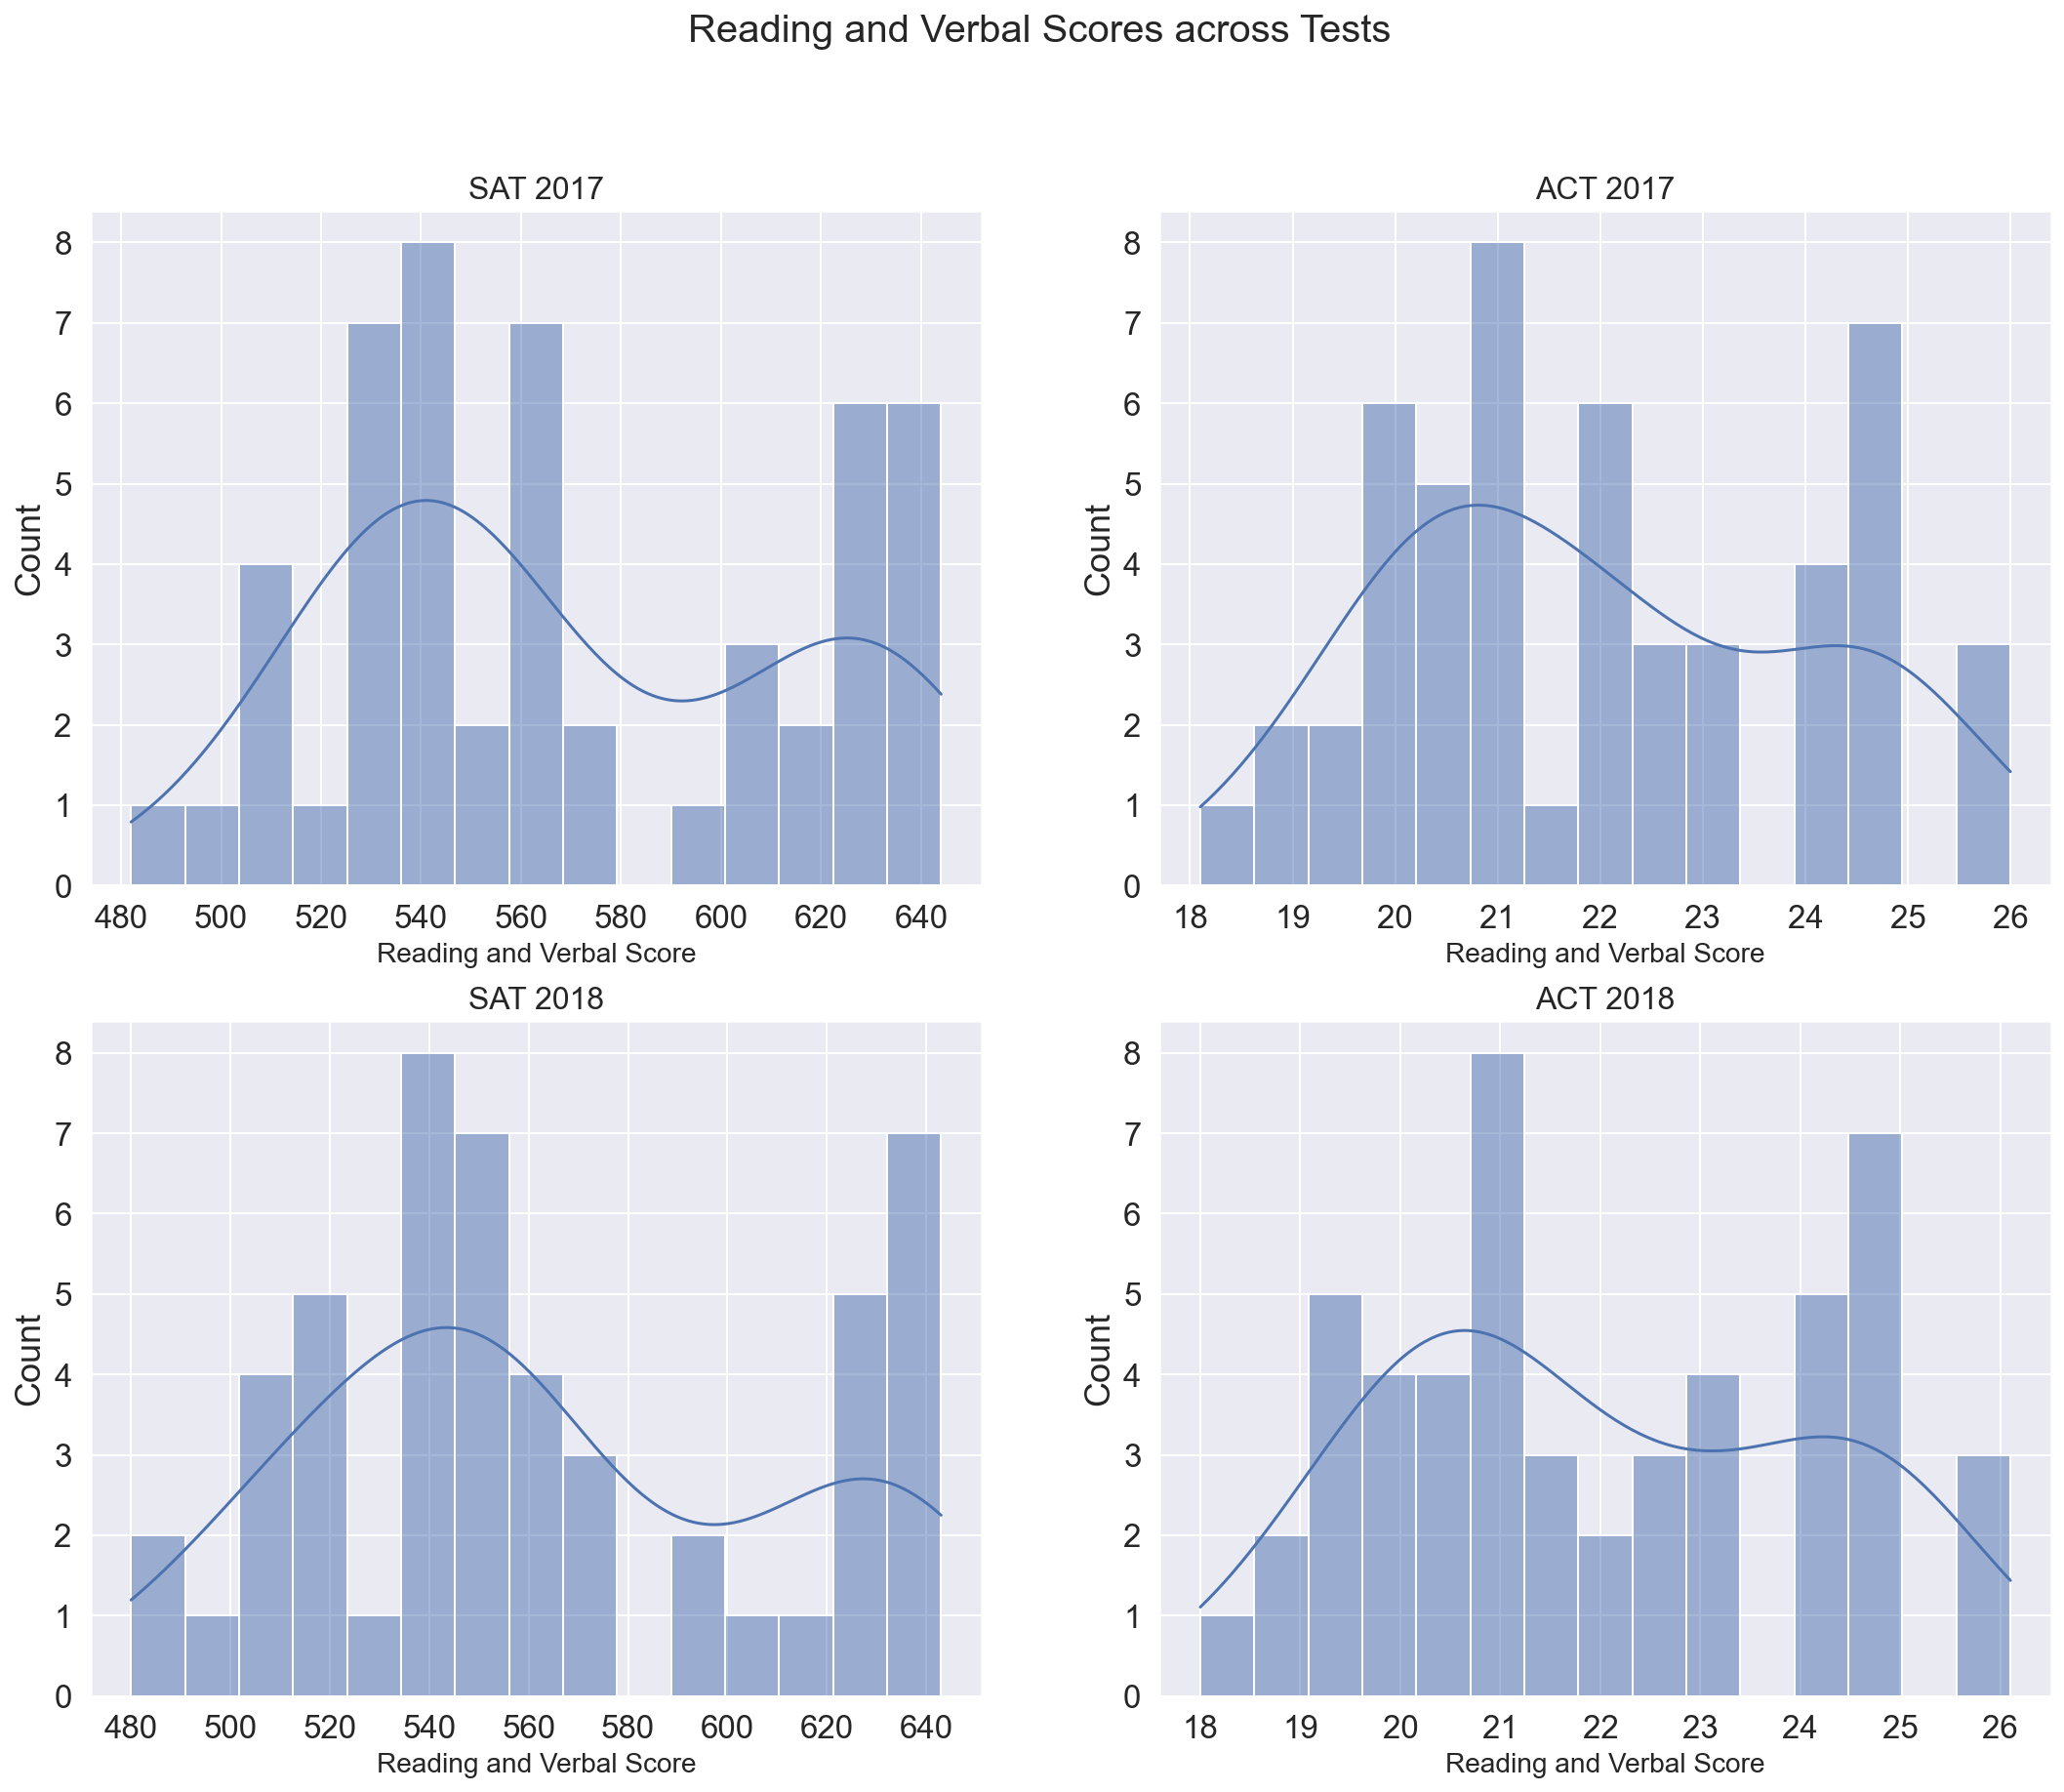

In [57]:
subplot_histograms(final, ['sat_erw_2017', 'act_reading_2017', 'sat_erw_2018', 'act_reading_2018'],
                  ['SAT 2017', 'ACT 2017', 'SAT 2018', 'ACT 2018'],
                  ['Reading and Verbal Score', 'Reading and Verbal Score', 'Reading and Verbal Score', 'Reading and Verbal Score'])
plt.suptitle("Reading and Verbal Scores across Tests", fontsize = 20)

The math scores for the SATs and the ACTs have a bimodal distribution for both years and all the distributions seem to be skewed more towards the right, showing similarity with the math scores

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [58]:
def scatter_plot(df, x_column, y_column):
    scatplot = sns.regplot(data = df, x = x_column, y = y_column)
    return scatplot

a) SAT vs. ACT math scores for 2017

Text(0.5, 1.0, 'Comparison between SAT and ACT Math Scores for 2017')

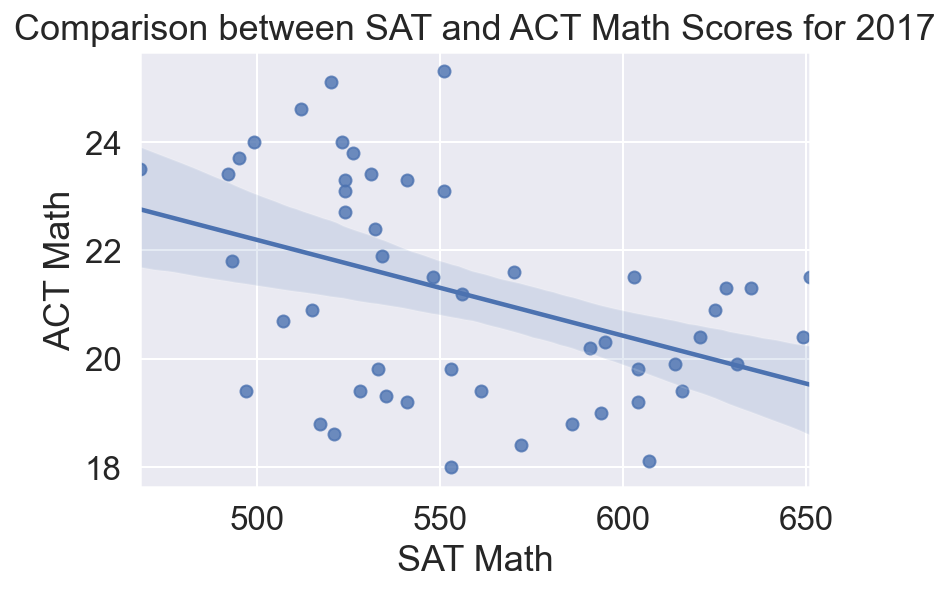

In [59]:
scatter_plot(final, 'sat_math_2017', 'act_math_2017')
plt.xlabel('SAT Math')
plt.ylabel('ACT Math')
plt.title("Comparison between SAT and ACT Math Scores for 2017")

b) SAT vs. ACT verbal/reading scores for 2017

Text(0.5, 1.0, 'Comparison between SAT and ACT Verbal/Reading Scores for 2017')

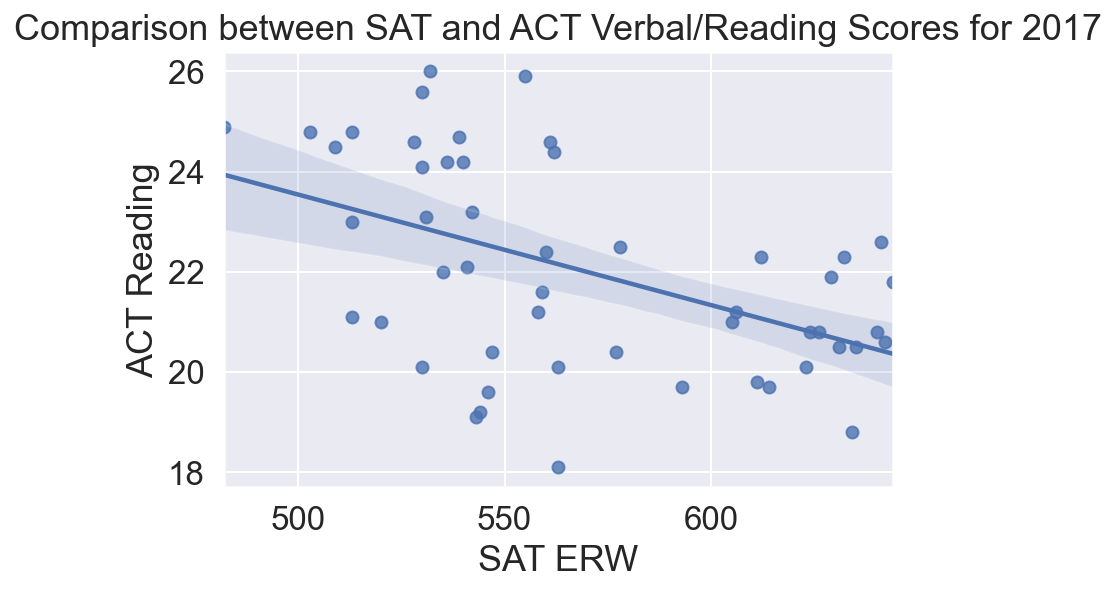

In [60]:
scatter_plot(final, 'sat_erw_2017', 'act_reading_2017')
plt.xlabel('SAT ERW')
plt.ylabel('ACT Reading')
plt.title("Comparison between SAT and ACT Verbal/Reading Scores for 2017")

c) SAT vs. ACT total/composite scores for 2017

Text(0.5, 1.0, 'Comparison between SAT and ACT Total/Composite Scores for 2017')

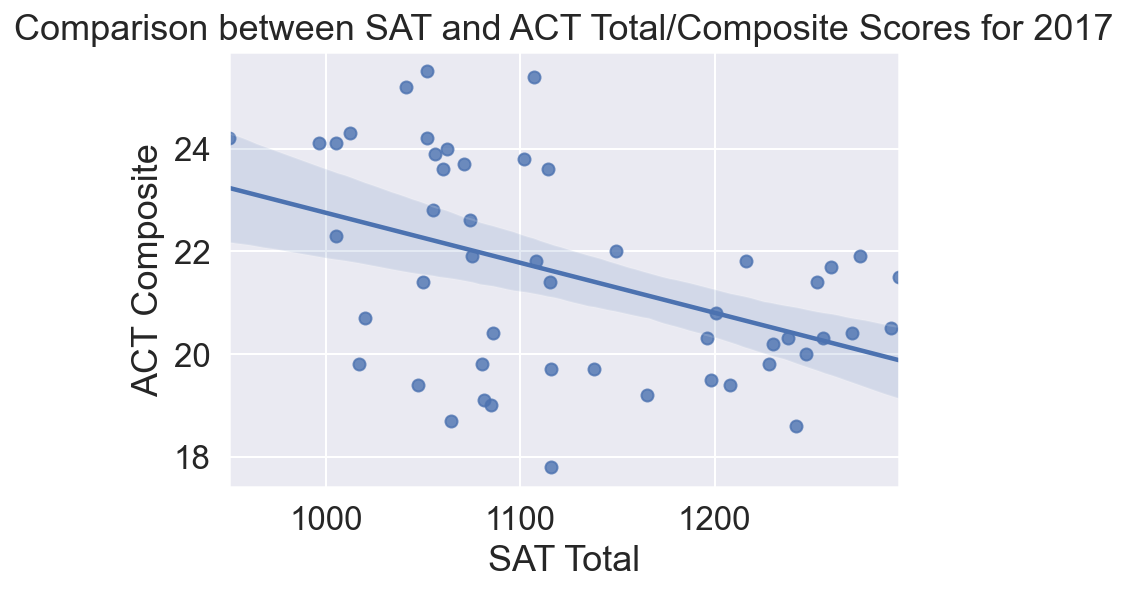

In [61]:
scatter_plot(final, 'sat_total_2017', 'act_composite_2017')
plt.xlabel('SAT Total')
plt.ylabel('ACT Composite')
plt.title("Comparison between SAT and ACT Total/Composite Scores for 2017")

As seen in the scatter plots of subjects in a), b) and c), all the SAT test scores have a weak negative correlation with the respective ACT test scores. Majority of the points lie away from the best fit line and are vastly scattered.

d) Total scores for SAT 2017 vs. 2018

Text(0.5, 1.0, 'Comparison between SAT Total Scores for 2017 and 2018')

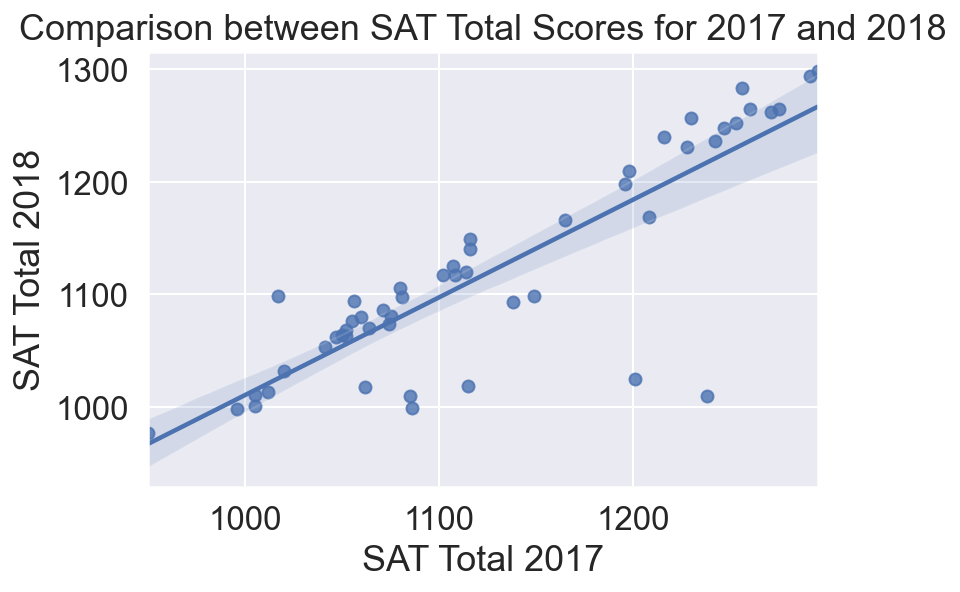

In [62]:
scatter_plot(final, 'sat_total_2017', 'sat_total_2018')
plt.xlabel('SAT Total 2017')
plt.ylabel('SAT Total 2018')
plt.title("Comparison between SAT Total Scores for 2017 and 2018")

e) Composite scores for ACT 2017 vs. 2018

Text(0.5, 1.0, 'Comparison between ACT Composite Scores for 2017 and 2018')

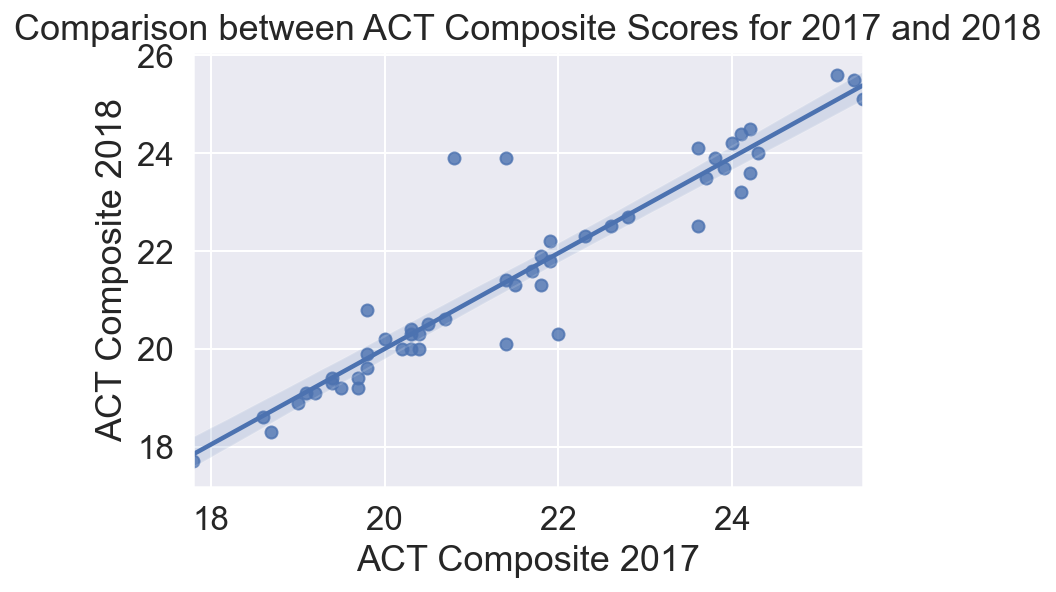

In [63]:
scatter_plot(final, 'act_composite_2017', 'act_composite_2018')
plt.xlabel('ACT Composite 2017')
plt.ylabel('ACT Composite 2018')
plt.title("Comparison between ACT Composite Scores for 2017 and 2018")

Both the SAT and ACT Total/Composite Scores for 2017 have a strong positive correlation with their respective SAT/ACT Total/Composite Score for 2018. Majority of the points lie close to/are on the line of best fit.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [64]:
#function to plot boxplots
def box_plot(df, list_of_columns, figsize = (6, 8), palette = None):
    fig, ax = plt.subplots(figsize = figsize)
    boxplot = sns.boxplot(data = df[list_of_columns], ax = ax, orient = 'h', palette = palette)
    return boxplot

a) SAT and ACT Participation Rates 2017-2018

Text(0.5, 0, 'Participation Rates')

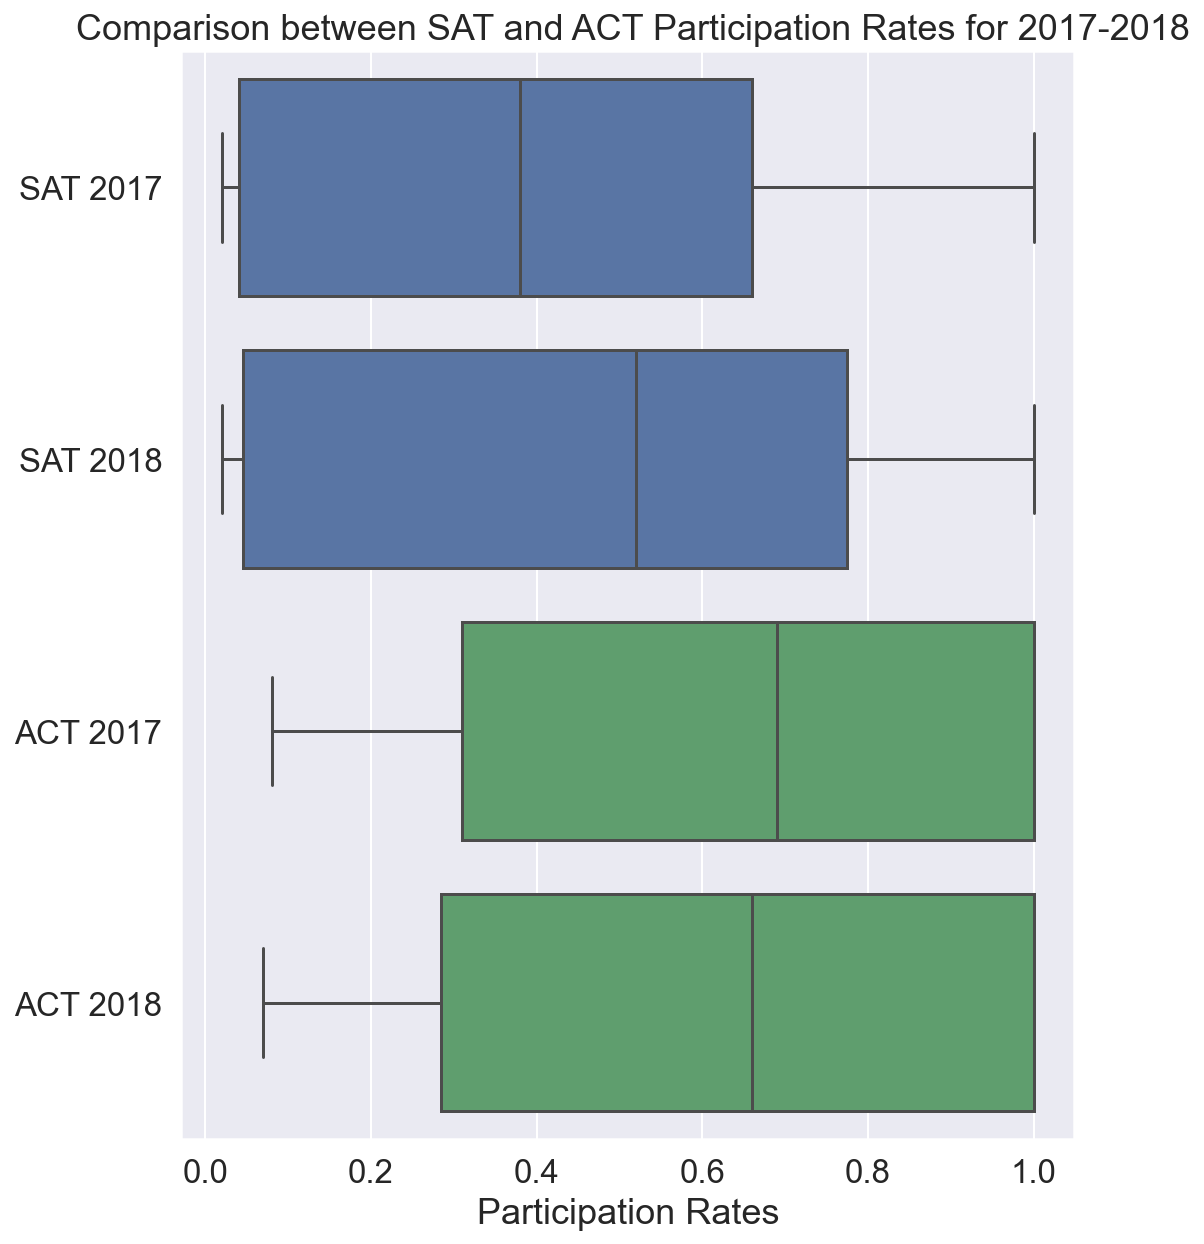

In [65]:
boxplot = box_plot(final, ['sat_part_2017', 'sat_part_2018', 'act_part_2017', 'act_part_2018'], figsize = (8,10),
                  palette = ['b', 'b', 'g', 'g'])
boxplot.set_yticklabels(["SAT 2017", "SAT 2018", "ACT 2017", "ACT 2018"])
plt.title(" Comparison between SAT and ACT Participation Rates for 2017-2018")
plt.xlabel("Participation Rates")

As seen in the diagram, ACTs have a higher participation rates for both 2017 and 2018, as compared to the SATs. The ACT distributions are right skewed while the SAT distributions are left skewed. Preliminary investigations showed that a few states had their participation rates increased to 100%, and this is reflected in the figure above with SAT having a higher median value. The Interquartile Range (IQR) is also greater for SAT 2018 than SAT 2017.

b) All SAT Subtests 2017-2018

Text(0.5, 0, 'Scores')

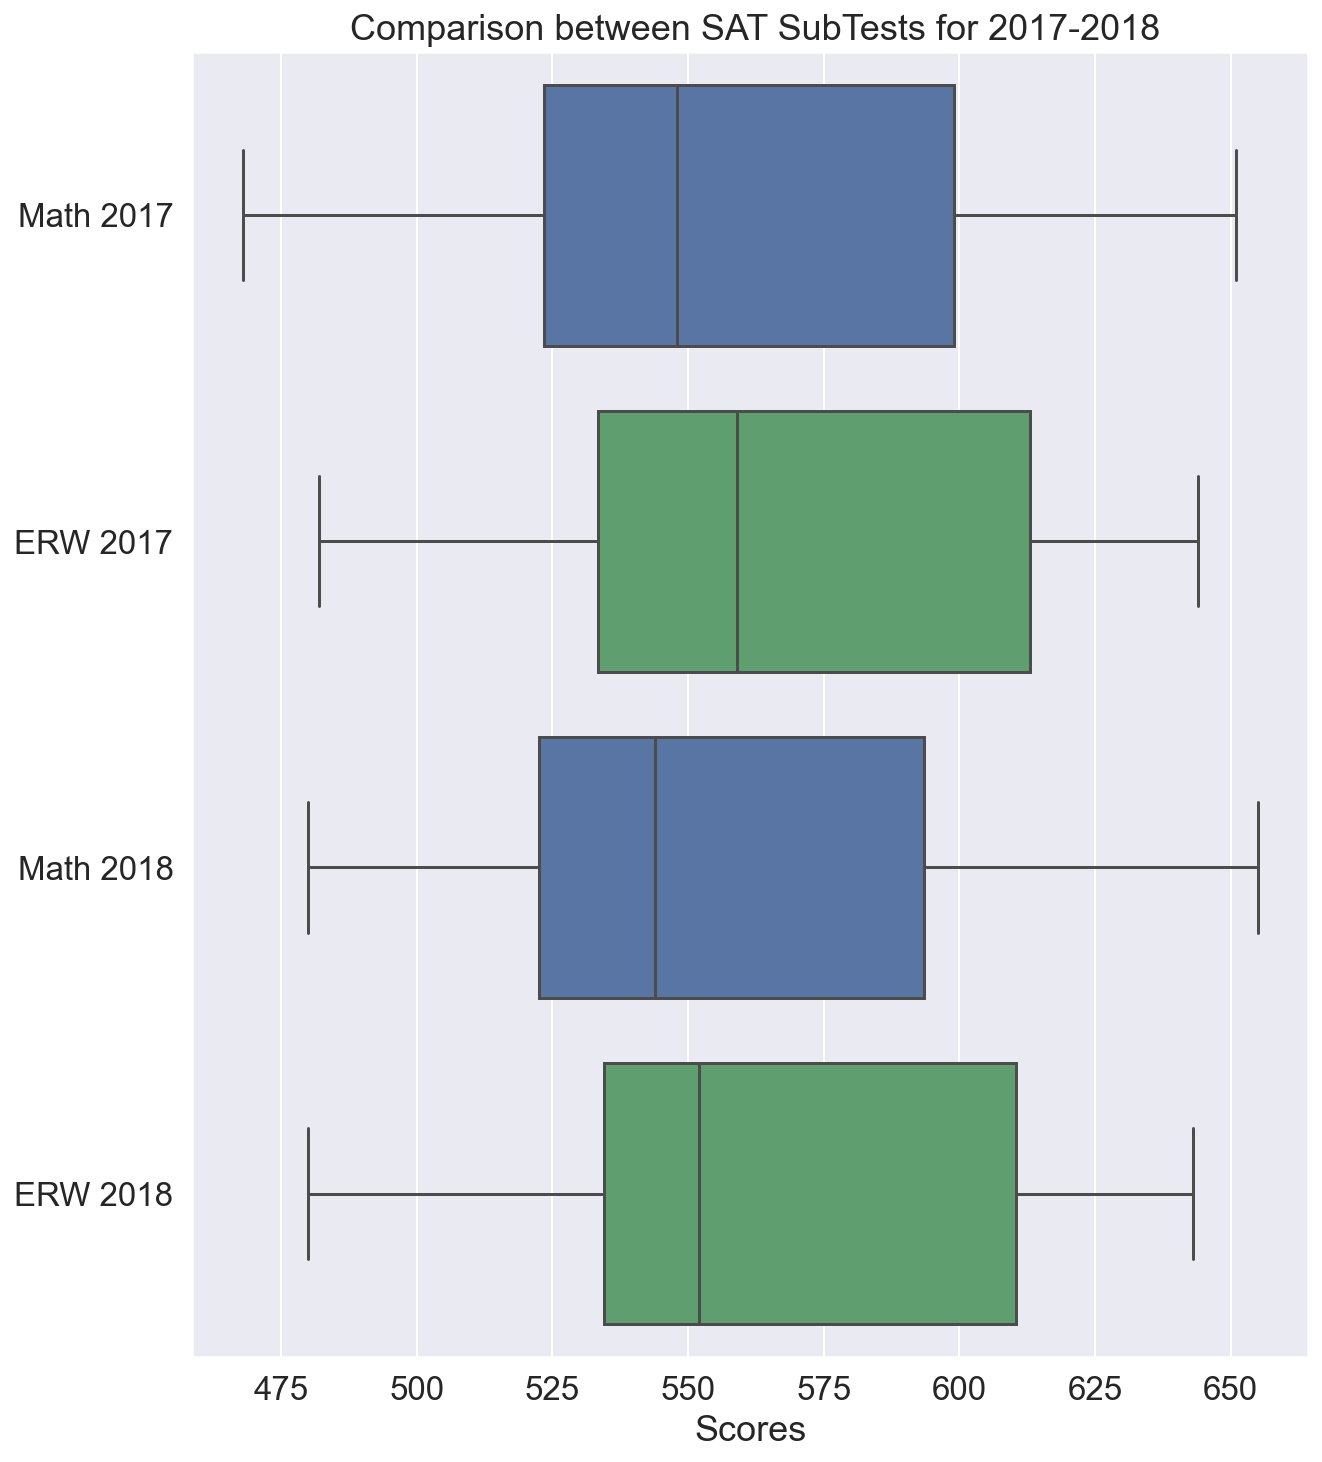

In [66]:
boxplot = box_plot(final, ['sat_math_2017', 'sat_erw_2017', 'sat_math_2018', 'sat_erw_2018'], figsize = (10,12),
                  palette = ['b', 'g', 'b', 'g'])
boxplot.set_yticklabels(["Math 2017", "ERW 2017", "Math 2018", "ERW 2018"])
plt.title(" Comparison between SAT SubTests for 2017-2018")
plt.xlabel("Scores")

Students did better for the Evidence-Based Reading and Writing (ERW) Tests in both 2017 and 2018 than the Math Tests. This is evident from the higher medians for both ERW 2017 and ERW 2018 as compared to Math 2017 and 2018. The ERW 2017 and 2018 score distributions are right skewed while the Math 2017 and 2018 score distributions are left skewed.

c) All ACT Subtests 2017-2018

Text(0.5, 0, 'Scores')

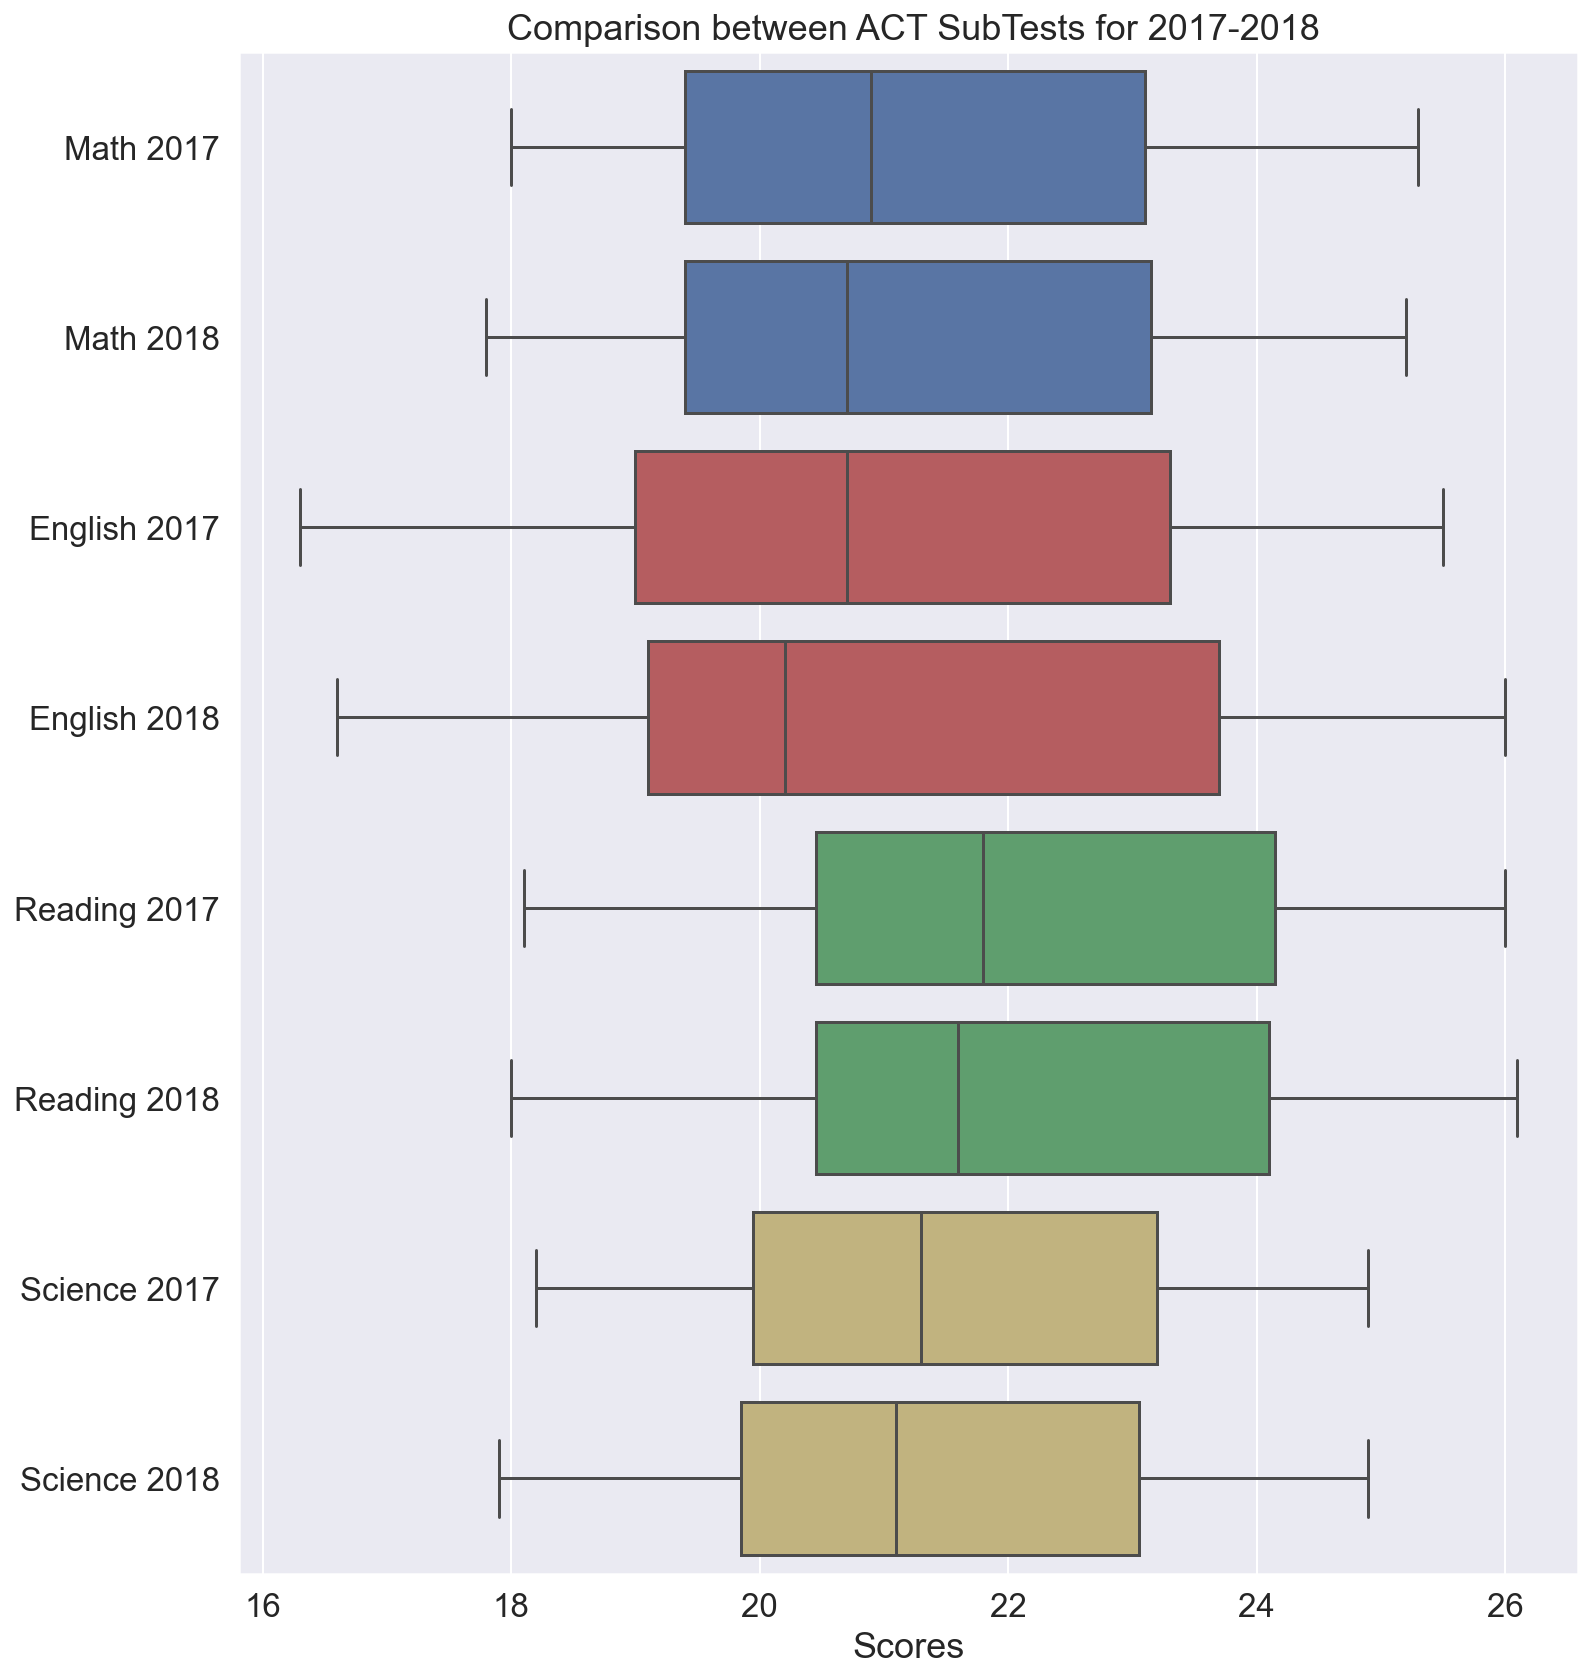

In [67]:
boxplot = box_plot(final, ['act_math_2017', 'act_math_2018', 'act_english_2017', 'act_english_2018', 
                           'act_reading_2017', 'act_reading_2018', 'act_science_2017','act_science_2018'], 
                           figsize = (12,14), palette = ['b', 'b', 'r', 'r', 'g', 'g', 'y', 'y'])
boxplot.set_yticklabels(["Math 2017", "Math 2018", "English 2017", "English 2018",
                         "Reading 2017", "Reading 2018", "Science 2017", "Science 2018"])
plt.title(" Comparison between ACT SubTests for 2017-2018")
plt.xlabel("Scores")

For both 2017 and 2018, students have performed the best in the Reading Tests and the worst in the English Tests. The Reading tests in 2017 and 2018 have the highest medians while the English Tests hold the lowest medians for both 2017 and 2018. The range and IQR also appear to be the largest for the English Tests in 2017 and 2018. The range and the IQR for the Science tests in 2017 and 2018 appear to be the smallest.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

a) SAT Participation Rate 2017

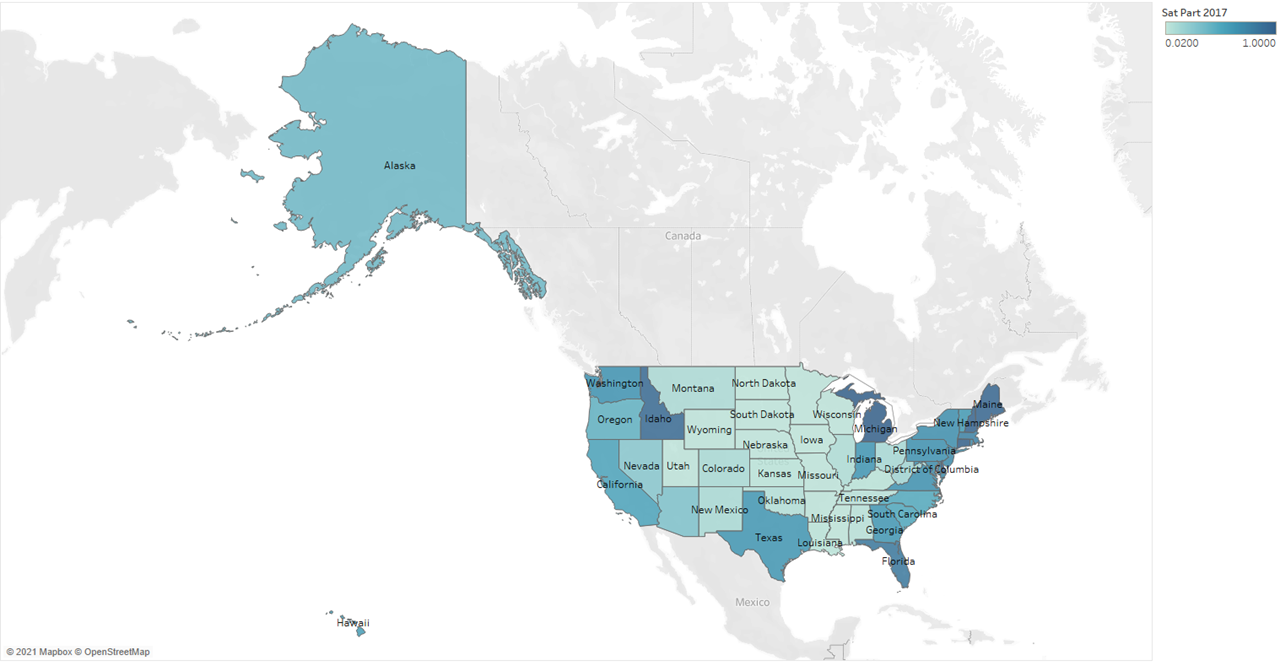

b) ACT Participation Rate 2017

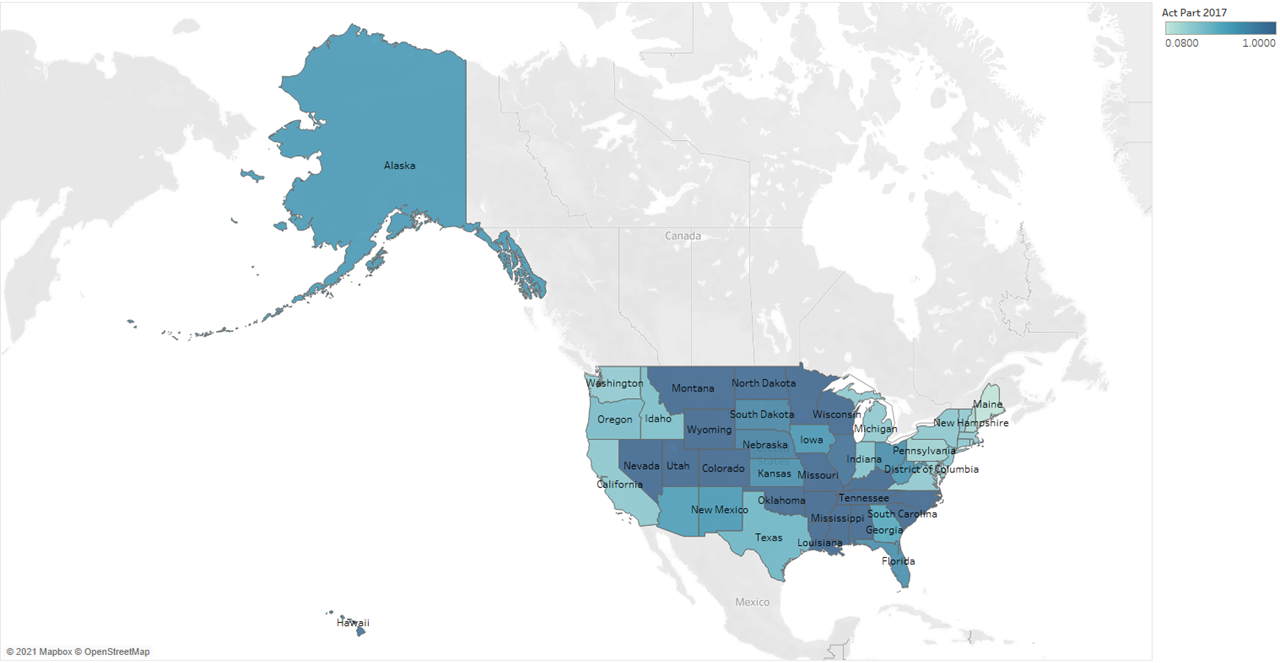

c) SAT Participation Rate 2018

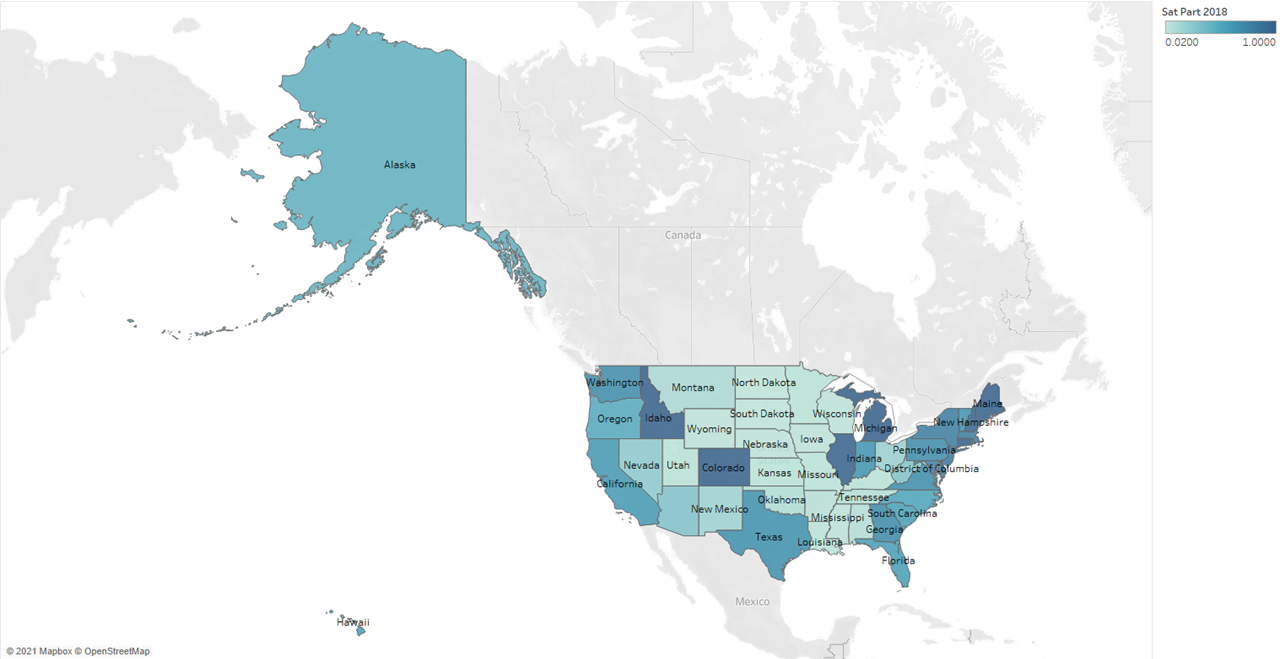

d) ACT Participation Rate 2018

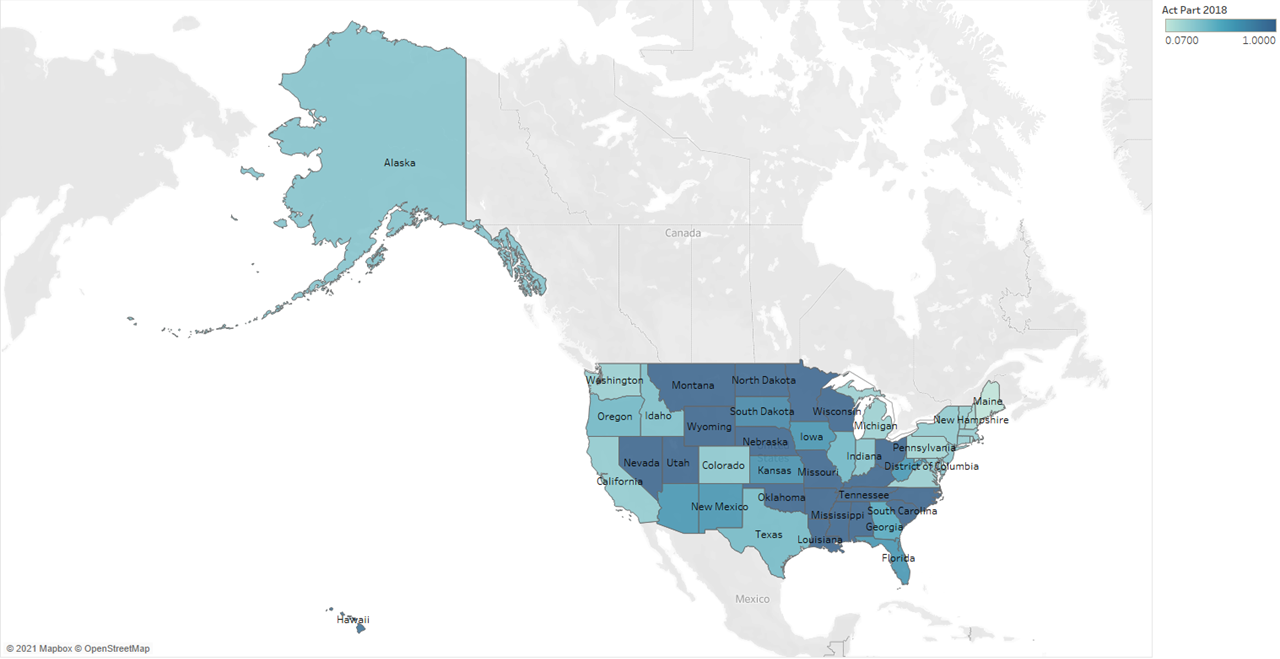

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Summarising Distributions - All Tests

In [73]:
#select all SAT variables
sat2017_summary = final.describe().T[:4]
sat2018_summary = final.describe().T[10:14]
sat_summary = pd.concat([sat2017_summary, sat2018_summary]).iloc[:,1:]

In [74]:
#calculate skew
sat_summary['skewness'] = [skew(final[var], bias=False) for var in sat_summary.index]
sat_summary

,mean,std,min,25%,50%,75%,max,skewness
sat_part_2017,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0,0.346450
sat_erw_2017,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0,0.272693
sat_math_2017,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0,0.365040
sat_total_2017,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0,0.310903
sat_part_2018,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0,0.136228
sat_erw_2018,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0,0.282300
sat_math_2018,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0,0.530407
sat_total_2018,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0,0.466432


In [75]:
#select all SAT variables
act2017_summary = final.describe().T[4:10]
act2018_summary = final.describe().T[14:]
act_summary = pd.concat([act2017_summary, act2018_summary]).iloc[:,1:]

In [76]:
#calculate skew
act_summary['skewness'] = [skew(final[var], bias=False) for var in act_summary.index]
act_summary

,mean,std,min,25%,50%,75%,max,skewness
act_part_2017,0.652549,0.321408,0.08,0.310,0.69,1.00,1.0,-0.197989
act_english_2017,20.931373,2.353677,16.30,19.000,20.70,23.30,25.5,0.352660
act_math_2017,21.182353,1.981989,18.00,19.400,20.90,23.10,25.3,0.332683
act_reading_2017,22.013725,2.067271,18.10,20.450,21.80,24.15,26.0,0.269366
act_science_2017,21.450980,1.739353,18.20,19.950,21.30,23.20,24.9,0.218823
act_composite_2017,21.519608,2.020695,17.80,19.800,21.40,23.60,25.5,0.319810
act_part_2018,0.616471,0.340810,0.07,0.285,0.66,1.00,1.0,-0.021916
act_composite_2018,21.486275,2.106278,17.70,19.950,21.30,23.55,25.6,0.281962
act_english_2018,20.988235,2.446356,16.60,19.100,20.20,23.70,26.0,0.371507
act_math_2018,21.125490,2.035765,17.80,19.400,20.70,23.15,25.2,0.269548


#### We generally assume that data we sample from a population will be normally distributed. Do we observe this trend?

None of the distributions investigated above show any signs of a normal distribution. Even though the Central Limit Theorem (CLT) pushes for normal distribution from data sampled for a population, this was not observed from the data analysis. Some factors that could have contributed to a non-normal distribution could be:
    - The lack of randomness in our data. For CLT to work, the data must be completely random. However in this case, data from each State is treated as a sample. Additionally, the data are provided by each individual state and the data could have been picked from specific high schools that take either the ACTs and SATs (and not both) that provide a fairly accurate representation of their State.
    - Although theoretically a sample size of more than 30 is sufficient for CLT to take place, a large sample size provides a better representation of the CLT and a more normal distribution. In this case 51 states may not be 'large' enough for CLT to take place.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

    a) Math 
    
The distribution of the math scores were skewed to the right as seen from the histogram as well as the skewness calculated in the tables above, indicating that the distribution is not normal.
    
    b) Reading
The distribution of the reading scores were also skewed to the right as seen from the histogram as well as the skewness calculated in the tables above, indicating that the distribution is not normal.
    
    c) Rates
The distribution of the participation rates for SAT and ACT were skewed to the right and left respectively, indicating an inverse relationship. This is also represented by the table above with the ACT participation rates holding a negative skew value while the SAT participation holds a positive value. This indicates that the distribution is not normal as well.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

No, it does not. There are multiple reasons that contribute to this:

1. The sample size is not large enough, as established above. Hence the CLT will not hold.
2. The samples are not randomised, limiting the CLT as well.
3. There are multiple factors that contribute to a student's participation in either the SATs or the ACTs and there is no supported data for these factors. These factors hinder the ability to understand the relationships between the SAT and ACT Participation rates severely. Some examples include: 
    - Household Income
    - Personal Preference for Type of Exam
    - State-wide Policies and Regulations
    - School Mandated Exams (Mandatory to take either SATs or ACTs)
    - School Policies and Regulations of Exams


Hence, to be able to conduct statistical inference thoroughly, it is essential to obtain randomised data, preferably nation-wide. Even if state wide data is obtained, it is essential to have a consistent sample size amongst all states. Additionally, it is essential to consider important factors such as household income and personal preference of exam that significantly affect the participation rates for either exams.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

The SAT Math Test and the ACT Math Test have completely different grading systems and structures of the tests. [Prepzone Academy](https://sat.edu.sg/sat-vs-act/#:~:text=For%20the%20ACT%2C%20scores%20are,2%2D8%20on%20the%20SAT.) has provided a very helpful comparison between the SATs and the ACTs. Other than the obvious difference in grading systems, the two tests differ by the number of questions tested, the time provided to complete the tests and the provision of mathematical formulas. With varying conditions, there is no basis of comparison between the SAT Math scores and the ACT Math scores.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

 1. Colorado
 
Colorado had one of the drastic increases in SAT Participation rates and also saw a significantly large fall in the ACT Participation rate. A good prediction would be the mandatory SAT participation in schools, hence the participation being 100% in 2018. 

This prediction is true as supported by [The Denver Post](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/). The article cited the College Board finding the SATs being more relevant and aligned to Colorado Academic Standards more hence making it mandatory in Colorado High Schools. 

In [77]:
final.loc[final['state'] == 'Colorado', ['state', 'sat_part_2017', 'sat_part_2018', 'sat_total_2017', 'sat_total_2018',
                                        'act_part_2017','act_part_2018', 'act_composite_2017', 'act_composite_2018']]

,state,sat_part_2017,sat_part_2018,sat_total_2017,sat_total_2018,act_part_2017,act_part_2018,act_composite_2017,act_composite_2018
5,Colorado,0.11,1.0,1201,1025,1.0,0.3,20.8,23.9


2. Illinois

In 2016, the [Illinois State Board of Education](https://www.chicagotribune.com/news/breaking/ct-parcc-test-high-school-met-20160711-story.html) had decided to end the 'controversial' PARCC exam. The ACTs used to be offered in Illinois but their contract with ACT had ended and the board decided to shift to SATs instead. Hence, there was a significant increase in the SAT Participation Rate from 2017 to 2018. 

In [78]:
final.loc[final['state'] == 'Illinois', ['state', 'sat_part_2017', 'sat_part_2018', 'sat_total_2017', 'sat_total_2018',
                                        'act_part_2017','act_part_2018', 'act_composite_2017', 'act_composite_2018']]

,state,sat_part_2017,sat_part_2018,sat_total_2017,sat_total_2018,act_part_2017,act_part_2018,act_composite_2017,act_composite_2018
13,Illinois,0.09,0.99,1115,1019,0.93,0.43,21.4,23.9


3. North and South Carolina

For many states we have seen the seen the participation rates leaning towards either the SATs or the ACTs. However, the preliminary investigations had shown North and South Carolina not only having more than 50% participation in the SATs but a 100% participation in the ACTs as well in 2018. 

[ACTs are a requirement](https://www.petersons.com/blog/states-requiring-the-act/) in both North and South Carolina, however, students do take the SATs to remain competitive with other students and [compete for the more prestigious universities](https://blog.prepscholar.com/do-you-need-to-take-both-the-act-and-sat#:~:text=No%20school%20will%20require%20you,the%20ACT%20and%20the%20SAT.), although it is not a requirement by any school in the US. Additionally, South Carolina provides [SATs for free to Students](https://blog.collegevine.com/states-that-require-sat/), giving the students there more opportunity to excel in both tests.

In [79]:
final.loc[(final['state'] == 'North Carolina') | (final['state'] == 'South Carolina'),
           ['state', 'sat_part_2017', 'sat_part_2018', 'sat_total_2017', 'sat_total_2018',
                                        'act_part_2017','act_part_2018', 'act_composite_2017', 'act_composite_2018']]

,state,sat_part_2017,sat_part_2018,sat_total_2017,sat_total_2018,act_part_2017,act_part_2018,act_composite_2017,act_composite_2018
33,North Carolina,0.49,0.52,1081,1098,1.0,1.0,19.1,19.1
40,South Carolina,0.50,0.55,1064,1070,1.0,1.0,18.7,18.3


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Key Takeaways: 
Although no University/College in America has ever provided preference of one admission test over the other, there is a lot of competition between the two tests. It is also interesting to see how different states delegate to mandate either tests or make them completely optional. 

Additionally, there is a strong negative correlation between the participation rates for both tests. Maine and Mississippi are perfect examples of this correlation. This can be seen in the table below.

There is also a strong negative correlation between the participation rates and the total test scores as well.

In [82]:
final.loc[(final['state'] == 'Maine') | (final['state'] == 'Mississippi'),
           ['state', 'sat_part_2017', 'sat_part_2018', 'sat_total_2017', 'sat_total_2018',
                                        'act_part_2017','act_part_2018', 'act_composite_2017', 'act_composite_2018']]

,state,sat_part_2017,sat_part_2018,sat_total_2017,sat_total_2018,act_part_2017,act_part_2018,act_composite_2017,act_composite_2018
19,Maine,0.95,0.99,1012,1013,0.08,0.07,24.3,24.0
24,Mississippi,0.02,0.03,1242,1236,1.00,1.00,18.6,18.6




Recommendations for targeting states:

1. No Mandatory ACT/Optional ACT

The best place to start is by targeting states that do not mandate the ACTs. This provides opportunities to promote the SATs to schools and popularise with the students

2. High Test Participation Rates
States that have high participation rates without mandatory admissions tests show students are keen to take these tests willing to score places in universities.


Based on [Testive's](https://www.testive.com/state-sat-act) article, South Dakota has no mandatory SAT or ACT tests for high school students. This opens up opportunities to engage and promote SATs amongst schools in that state. Additionally, there is also high participation rate for a state with no mandatory tests.

In [81]:
final.loc[final['state'] == 'South Dakota', ['state', 'sat_part_2017', 'sat_part_2018', 'sat_total_2017', 'sat_total_2018',
                                        'act_part_2017','act_part_2018', 'act_composite_2017', 'act_composite_2018']]

,state,sat_part_2017,sat_part_2018,sat_total_2017,sat_total_2018,act_part_2017,act_part_2018,act_composite_2017,act_composite_2018
41,South Dakota,0.03,0.03,1216,1240,0.8,0.77,21.8,21.9


Recommendations for promoting SATs

1. Subsidies/Absorb Costs of SATs

Students no longer have to worry about expensive tests and provides accessibility, even to lower income households, to take the SATs

2. Improved Exam Preparation Resources

Collaborate with non-profit organisations/education companies to provide free learning resources (both online and offline) for students to prepare for the tests.

3. Location of Testing

Students are able to take the tests from the nearest educational institute from their place. This enhances accessibility and saves travel time for students, allowing them more time to prepare for their tests. 

4. Campaigns

Provision of talks in High Schools to increase understanding in students regarding the benefits of taking the SATs